In [1]:
import torch
import torchvision
from torchvision import transforms
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

PCA_COMPONENTS= 4
# Download MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create a DataLoader
data_loader = torch.utils.data.DataLoader(mnist_dataset, batch_size=len(mnist_dataset), shuffle=False)

# Get the data and labels
for images, labels in data_loader:
  images = images.view(images.shape[0], -1).numpy() # Reshape images to vectors

Using device: cuda


In [2]:
def train_and_evaluate_model(num_components):
    # Apply PCA
    pca = PCA(n_components=num_components)
    reduced_data = pca.fit_transform(images)

    # Convert reduced_data and labels to PyTorch tensors
   # Convert reduced_data and labels to PyTorch tensors
    X = torch.tensor(reduced_data, dtype=torch.float32).to(device)
    y = torch.tensor(labels, dtype=torch.long).to(device)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the neural network
    class SimpleNN(nn.Module):
        def __init__(self, input_size, hidden_size, num_classes):
            super(SimpleNN, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.relu = nn.ReLU()
            self.fc2 = nn.Linear(hidden_size, num_classes)

        def forward(self, x):
            out = self.fc1(x)
            out = self.relu(out)
            out = self.fc2(out)
            return out

  # Initialize the model, loss function, and optimizer
    input_size = num_components  # Number of PCA components
    hidden_size = 64
    num_classes = 10  # Number of classes (0-9)
    model = SimpleNN(input_size, hidden_size, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Train the model
    num_epochs = 10
    batch_size = 32

    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
          X_batch = X_train[i : i + batch_size]
          y_batch = y_train[i : i + batch_size]
          optimizer.zero_grad()
          outputs = model(X_batch)
          loss = criterion(outputs, y_batch)
          loss.backward()
          optimizer.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Evaluate the model
    with torch.no_grad():
      correct = 0
      total = 0
      outputs = model(X_test)
      _, predicted = torch.max(outputs.data, 1)
      total += y_test.size(0)
      correct += (predicted == y_test).sum().item()

    # Return the accuracy
    return 100 * correct / total

/tmp/ipykernel_2912073/2147975706.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(labels, dtype=torch.long).to(device)


Epoch [1/10], Loss: 1.3065
Epoch [2/10], Loss: 1.3061
Epoch [3/10], Loss: 1.3056
Epoch [4/10], Loss: 1.3113
Epoch [5/10], Loss: 1.3181
Epoch [6/10], Loss: 1.3228
Epoch [7/10], Loss: 1.3274
Epoch [8/10], Loss: 1.3316
Epoch [9/10], Loss: 1.3370
Epoch [10/10], Loss: 1.3397
PCA Components: 2, Accuracy: 45.99%


/tmp/ipykernel_2912073/2147975706.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(labels, dtype=torch.long).to(device)


Epoch [1/10], Loss: 1.0904
Epoch [2/10], Loss: 1.0933
Epoch [3/10], Loss: 1.0968
Epoch [4/10], Loss: 1.0936
Epoch [5/10], Loss: 1.0919
Epoch [6/10], Loss: 1.0907
Epoch [7/10], Loss: 1.0801
Epoch [8/10], Loss: 1.0720
Epoch [9/10], Loss: 1.0634
Epoch [10/10], Loss: 1.0556
PCA Components: 4, Accuracy: 64.70%


/tmp/ipykernel_2912073/2147975706.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(labels, dtype=torch.long).to(device)


Epoch [1/10], Loss: 0.4606
Epoch [2/10], Loss: 0.4682
Epoch [3/10], Loss: 0.4978
Epoch [4/10], Loss: 0.5268
Epoch [5/10], Loss: 0.5438
Epoch [6/10], Loss: 0.5520
Epoch [7/10], Loss: 0.5584
Epoch [8/10], Loss: 0.5627
Epoch [9/10], Loss: 0.5616
Epoch [10/10], Loss: 0.5596
PCA Components: 8, Accuracy: 88.85%


/tmp/ipykernel_2912073/2147975706.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(labels, dtype=torch.long).to(device)


Epoch [1/10], Loss: 0.3502
Epoch [2/10], Loss: 0.3287
Epoch [3/10], Loss: 0.3017
Epoch [4/10], Loss: 0.2786
Epoch [5/10], Loss: 0.2530
Epoch [6/10], Loss: 0.2319
Epoch [7/10], Loss: 0.2108
Epoch [8/10], Loss: 0.1961
Epoch [9/10], Loss: 0.1868
Epoch [10/10], Loss: 0.1795
PCA Components: 16, Accuracy: 95.36%


/tmp/ipykernel_2912073/2147975706.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(labels, dtype=torch.long).to(device)


Epoch [1/10], Loss: 0.3167
Epoch [2/10], Loss: 0.2191
Epoch [3/10], Loss: 0.1653
Epoch [4/10], Loss: 0.1355
Epoch [5/10], Loss: 0.1157
Epoch [6/10], Loss: 0.1015
Epoch [7/10], Loss: 0.0875
Epoch [8/10], Loss: 0.0779
Epoch [9/10], Loss: 0.0695
Epoch [10/10], Loss: 0.0612
PCA Components: 32, Accuracy: 97.08%

Results Summary:
PCA Components: 2, Accuracy: 45.99%
PCA Components: 4, Accuracy: 64.70%
PCA Components: 8, Accuracy: 88.85%
PCA Components: 16, Accuracy: 95.36%
PCA Components: 32, Accuracy: 97.08%


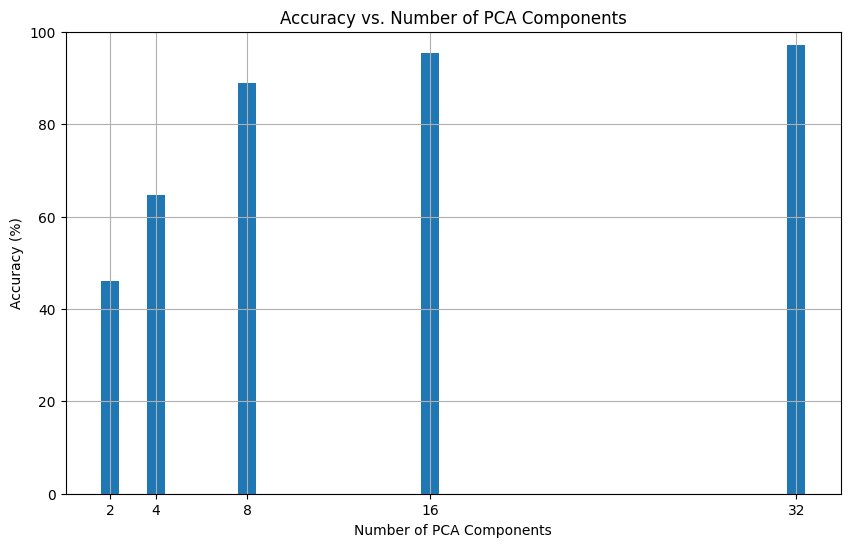

In [3]:
# List of PCA component numbers to test
component_numbers = [2, 4, 8, 16, 32]

# Store the results
results = {}

for num_components in component_numbers:
    accuracy = train_and_evaluate_model(num_components)
    results[num_components] = accuracy
    print(f'PCA Components: {num_components}, Accuracy: {accuracy:.2f}%')

# Print the results
print("\nResults Summary:")
for num_components, accuracy in results.items():
    print(f'PCA Components: {num_components}, Accuracy: {accuracy:.2f}%')

# Create a bar plot of the results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Number of PCA Components")
plt.xticks(list(results.keys()))  # Set x-axis ticks to component numbers
plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.grid(True)
plt.show()

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define the neural network
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.flatten = nn.Flatten()
        self.layers = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.layers(x)

# Load and preprocess the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std
])

# Load training and test datasets
train_dataset = torchvision.datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)

test_dataset = torchvision.datasets.MNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform=transform
)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the network
model = MNISTNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train(epochs):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], '
                      f'Loss: {running_loss/100:.4f}')
                running_loss = 0.0

# Test the model
def test():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Accuracy on test set: {accuracy:.2f}%')
    return accuracy



Using device: cuda


In [5]:
# Train and test the model
train(epochs=5)
test()

Epoch [1/5], Step [100/938], Loss: 0.5608
Epoch [1/5], Step [200/938], Loss: 0.2710
Epoch [1/5], Step [300/938], Loss: 0.1969
Epoch [1/5], Step [400/938], Loss: 0.1678
Epoch [1/5], Step [500/938], Loss: 0.1632
Epoch [1/5], Step [600/938], Loss: 0.1333
Epoch [1/5], Step [700/938], Loss: 0.1449
Epoch [1/5], Step [800/938], Loss: 0.1322
Epoch [1/5], Step [900/938], Loss: 0.1077
Epoch [2/5], Step [100/938], Loss: 0.0933
Epoch [2/5], Step [200/938], Loss: 0.0863
Epoch [2/5], Step [300/938], Loss: 0.0859
Epoch [2/5], Step [400/938], Loss: 0.0694
Epoch [2/5], Step [500/938], Loss: 0.1009
Epoch [2/5], Step [600/938], Loss: 0.0919
Epoch [2/5], Step [700/938], Loss: 0.0681
Epoch [2/5], Step [800/938], Loss: 0.0827
Epoch [2/5], Step [900/938], Loss: 0.0868
Epoch [3/5], Step [100/938], Loss: 0.0565
Epoch [3/5], Step [200/938], Loss: 0.0578
Epoch [3/5], Step [300/938], Loss: 0.0547
Epoch [3/5], Step [400/938], Loss: 0.0625
Epoch [3/5], Step [500/938], Loss: 0.0579
Epoch [3/5], Step [600/938], Loss:

97.56


Testing FGSM attack with ε=0


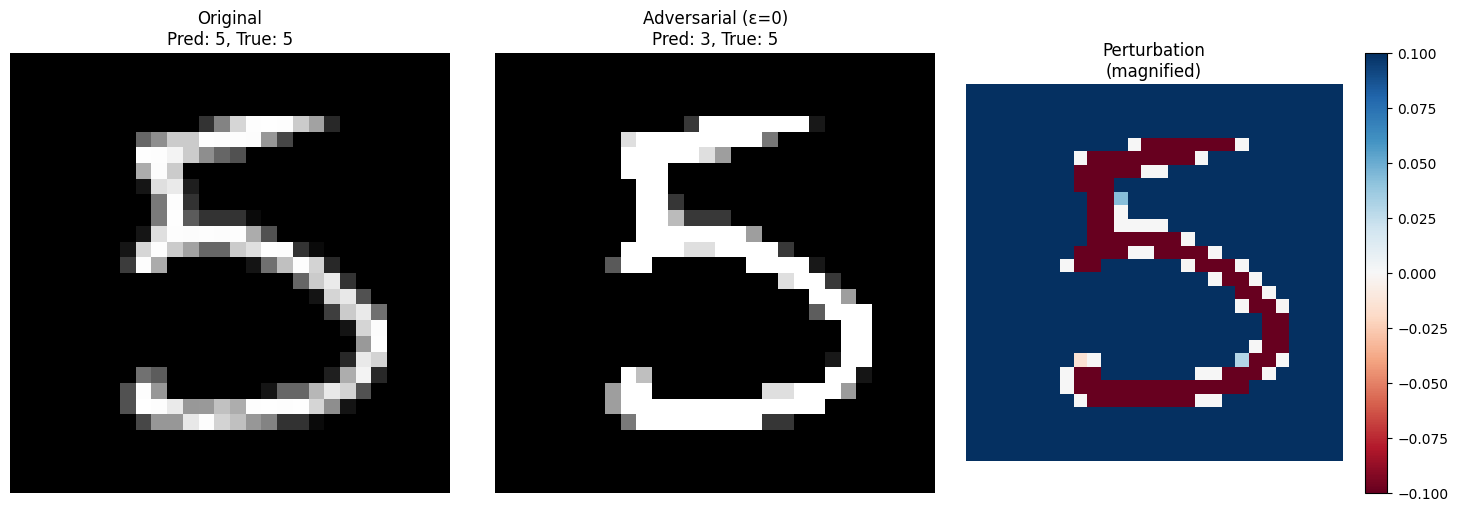

Accuracy on adversarial examples (ε=0): 96.57%

Testing FGSM attack with ε=0.1


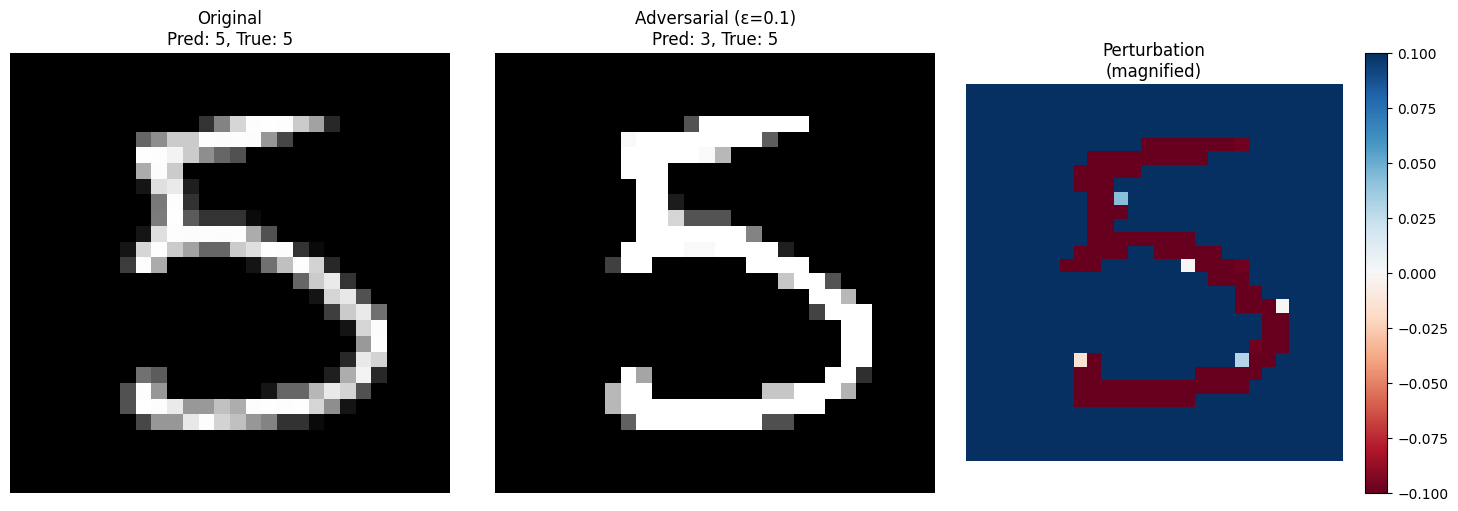

Accuracy on adversarial examples (ε=0.1): 95.75%

Testing FGSM attack with ε=0.5


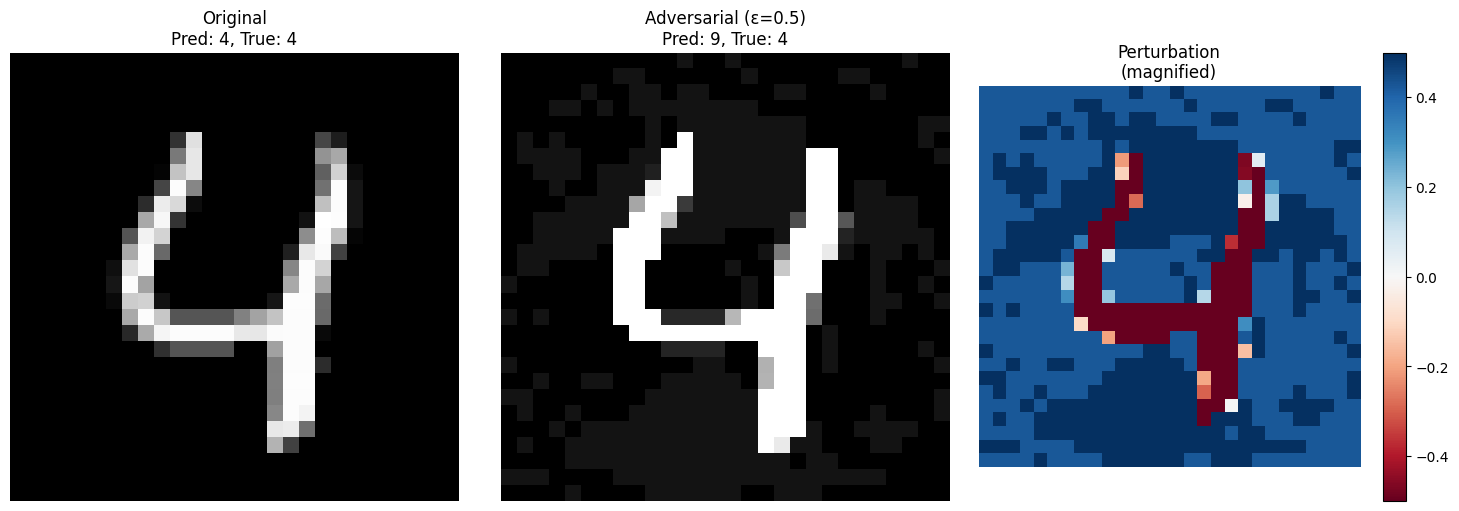

Accuracy on adversarial examples (ε=0.5): 69.87%

Testing FGSM attack with ε=0.75


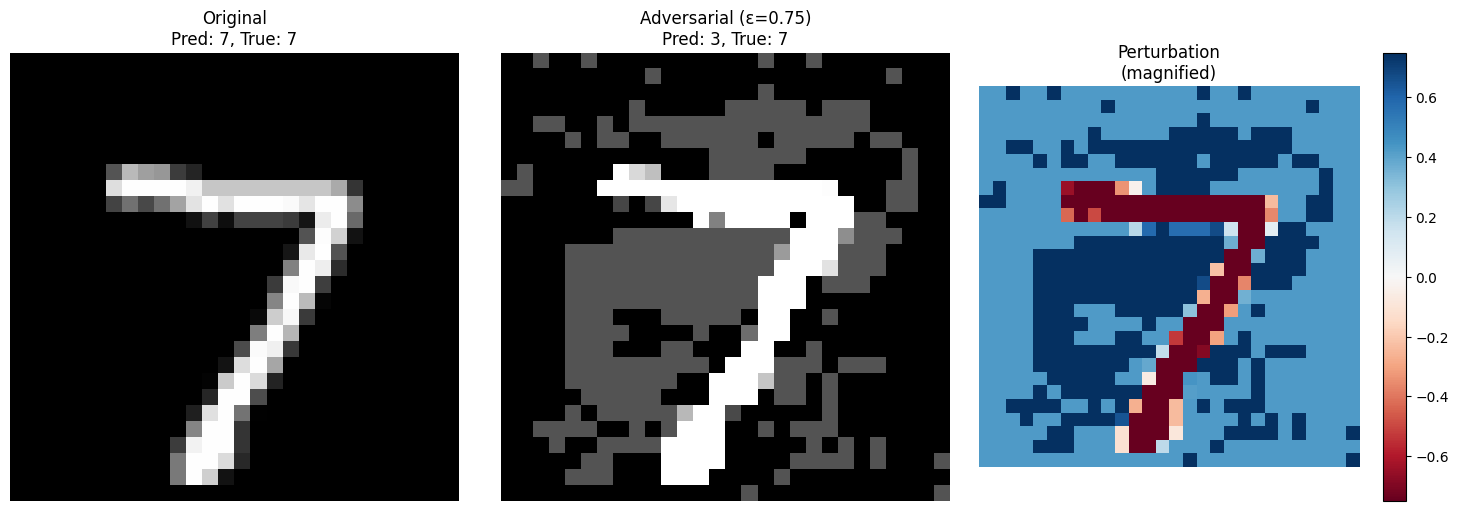

Accuracy on adversarial examples (ε=0.75): 15.37%

Testing FGSM attack with ε=1.0


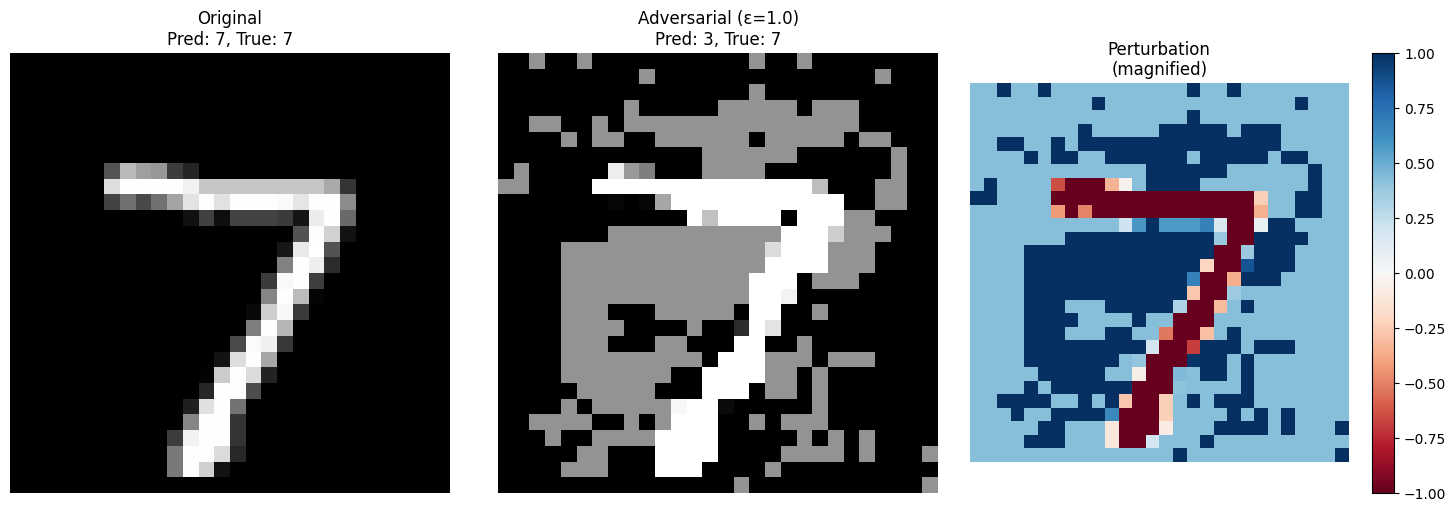

Accuracy on adversarial examples (ε=1.0): 4.95%


In [6]:
import torchattacks
import matplotlib.pyplot as plt

def show_images(original, adversarial, orig_label, adv_label, true_label, epsilon):
    """
    Display original and adversarial images side by side
    
    Args:
        original: Original image
        adversarial: Adversarial image
        orig_label: Model's prediction on original image
        adv_label: Model's prediction on adversarial image
        true_label: True label of the image
        epsilon: Perturbation magnitude
    """
    plt.figure(figsize=(15, 5))
    
    # Original image
    plt.subplot(1, 3, 1)
    plt.title(f'Original\nPred: {orig_label}, True: {true_label}')
    plt.imshow(original.squeeze().cpu().numpy(), cmap='gray')
    plt.axis('off')
    
    # Adversarial image
    plt.subplot(1, 3, 2)
    plt.title(f'Adversarial (ε={epsilon})\nPred: {adv_label}, True: {true_label}')
    plt.imshow(adversarial.squeeze().cpu().numpy(), cmap='gray')
    plt.axis('off')
    
    # Difference
    plt.subplot(1, 3, 3)
    plt.title('Perturbation\n(magnified)')
    difference = (adversarial - original).squeeze().cpu().numpy()
    plt.imshow(difference, cmap='RdBu', vmin=-epsilon, vmax=epsilon)
    plt.colorbar()
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Function to evaluate model on adversarial examples
def test_adversarial_torchattacks(attack, epsilon):
    """
    Evaluates the model's accuracy on adversarial examples generated by torchattacks.
    
    Args:
        attack (torchattacks.Attack): Attack instance from torchattacks.
        epsilon (float): Perturbation magnitude.
    
    Returns:
        accuracy (float): Model accuracy on adversarial examples.
    """
    model.eval()
    correct = 0
    total = 0
    
    # Flag to show only one example
    example_shown = False
    
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Generate adversarial examples
        adv_images = attack(images, labels)
        
        with torch.no_grad():
            # Get predictions for both original and adversarial images
            orig_outputs = model(images)
            adv_outputs = model(adv_images)
            
            _, orig_predicted = torch.max(orig_outputs.data, 1)
            _, adv_predicted = torch.max(adv_outputs.data, 1)
            
            total += labels.size(0)
            correct += (adv_predicted == labels).sum().item()
            
            # Show one example for each epsilon
            if not example_shown:
                # Find first correctly classified original image that's misclassified after attack
                for i in range(len(labels)):
                    if orig_predicted[i] == labels[i] and adv_predicted[i] != labels[i]:
                        show_images(
                            images[i], 
                            adv_images[i],
                            orig_predicted[i].item(),
                            adv_predicted[i].item(),
                            labels[i].item(),
                            epsilon
                        )
                        example_shown = True
                        break

    accuracy = 100 * correct / total
    print(f'Accuracy on adversarial examples (ε={epsilon}): {accuracy:.2f}%')
    return accuracy

# Test with different epsilon values
epsilons = [0, 0.1, 0.5, 0.75, 1.0]
for eps in epsilons:
    print(f"\nTesting FGSM attack with ε={eps}")
    attack = torchattacks.FGSM(model, eps=eps)
    test_adversarial_torchattacks(attack, eps)


Testing with ε=0.1, PCA components=10


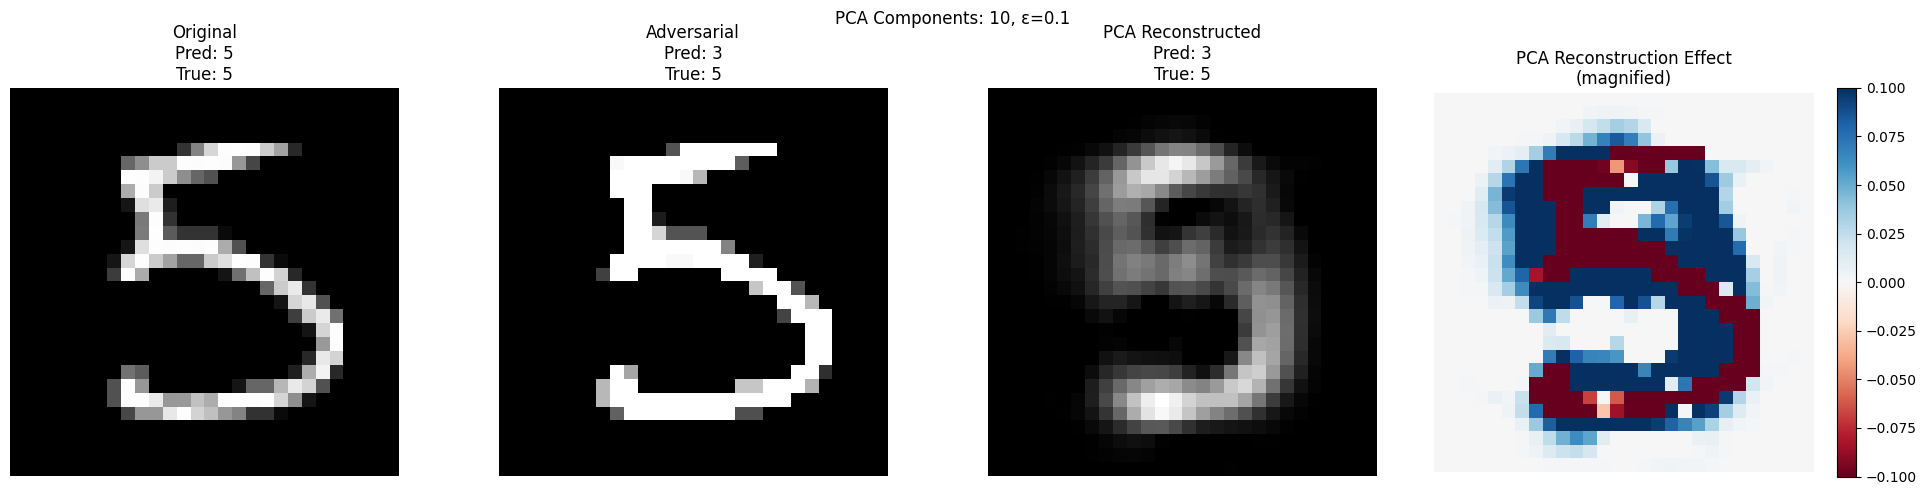


Results with 10 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 95.75%
PCA reconstructed accuracy: 75.29%

Testing with ε=0.1, PCA components=25


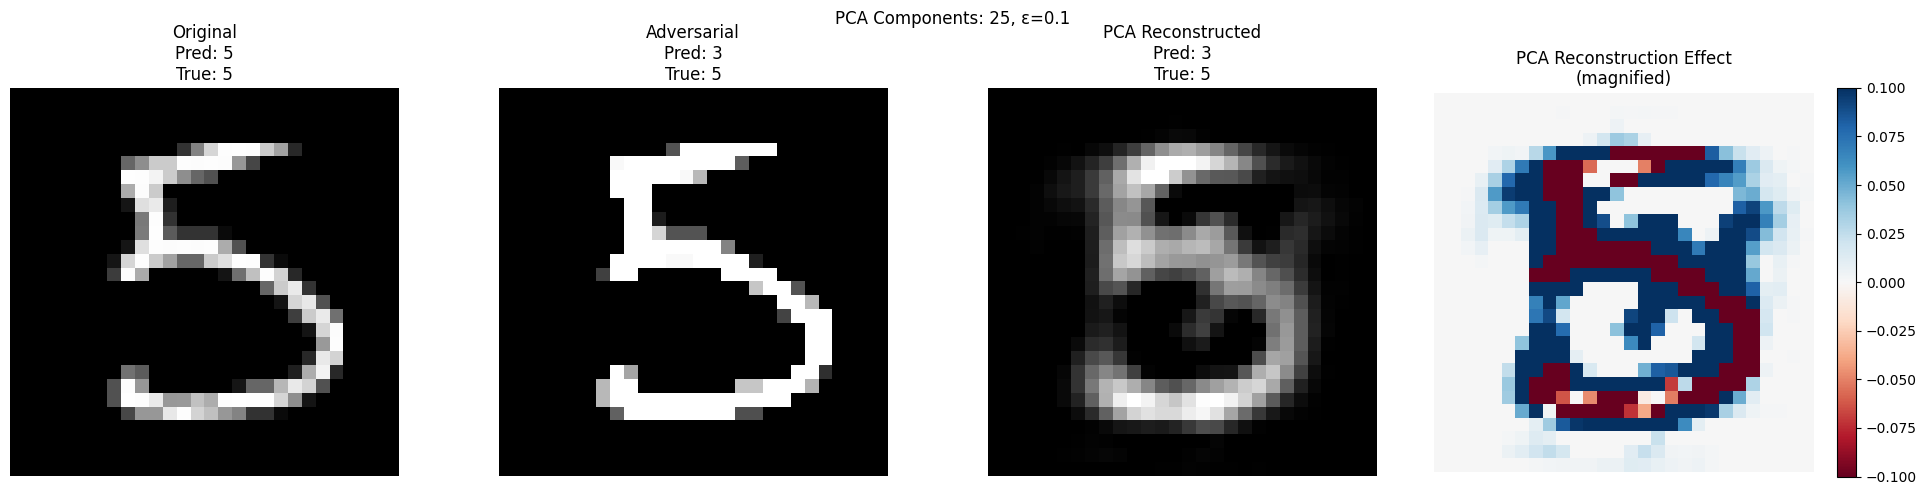


Results with 25 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 95.75%
PCA reconstructed accuracy: 91.80%

Testing with ε=0.1, PCA components=50


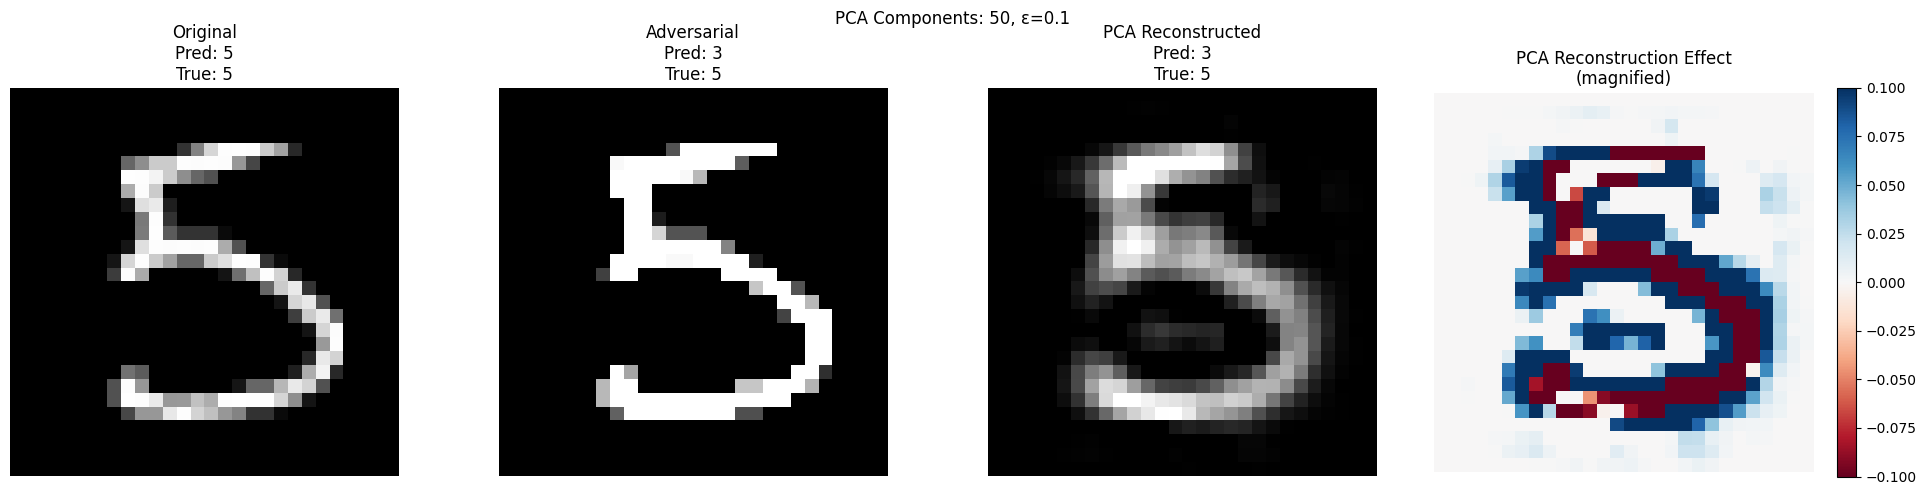


Results with 50 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 95.75%
PCA reconstructed accuracy: 94.71%

Testing with ε=0.1, PCA components=100


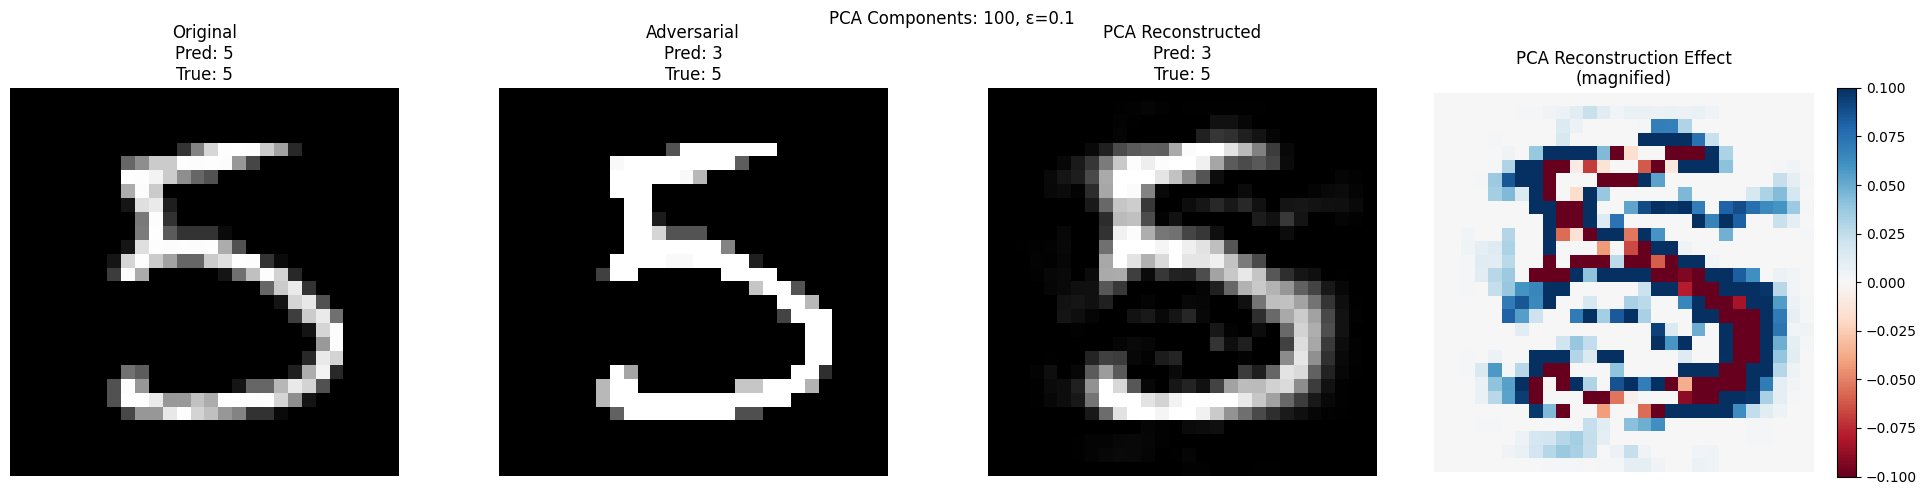


Results with 100 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 95.75%
PCA reconstructed accuracy: 95.28%

Testing with ε=0.1, PCA components=200


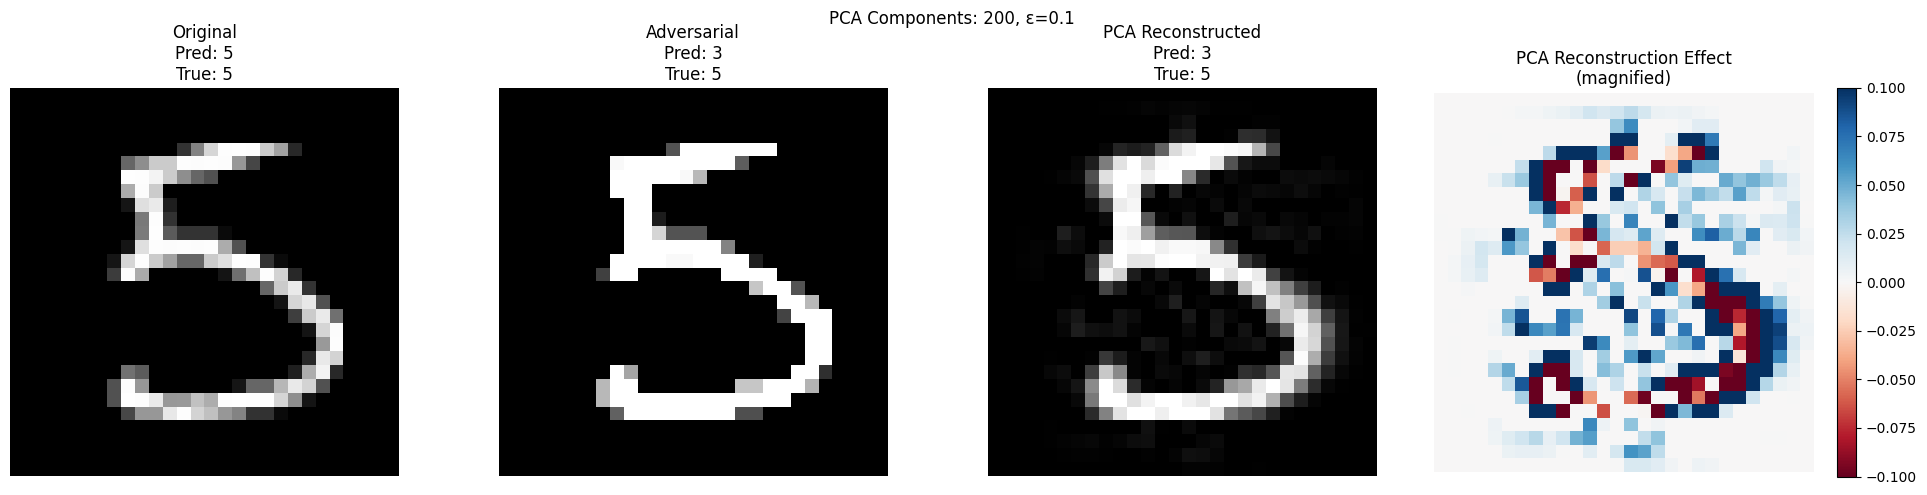


Results with 200 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 95.75%
PCA reconstructed accuracy: 95.27%

Testing with ε=0.3, PCA components=10


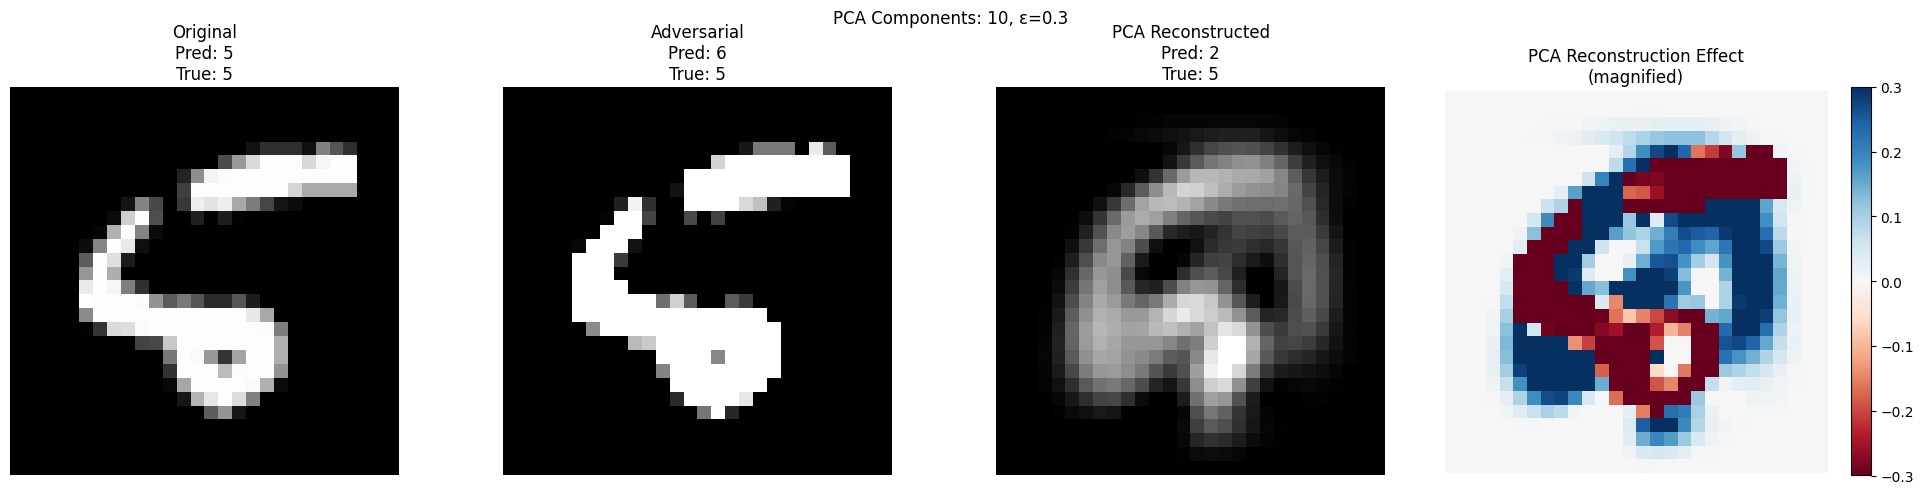


Results with 10 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 93.35%
PCA reconstructed accuracy: 73.17%

Testing with ε=0.3, PCA components=25


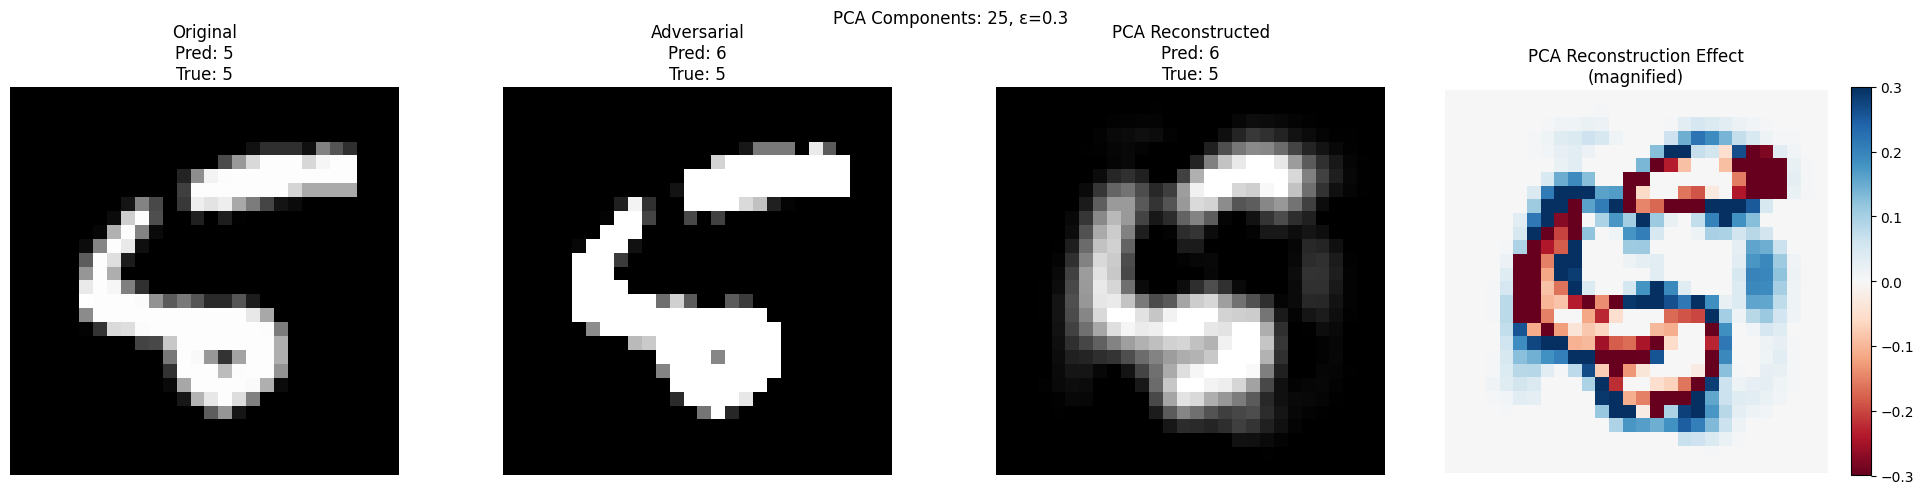


Results with 25 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 93.35%
PCA reconstructed accuracy: 89.72%

Testing with ε=0.3, PCA components=50


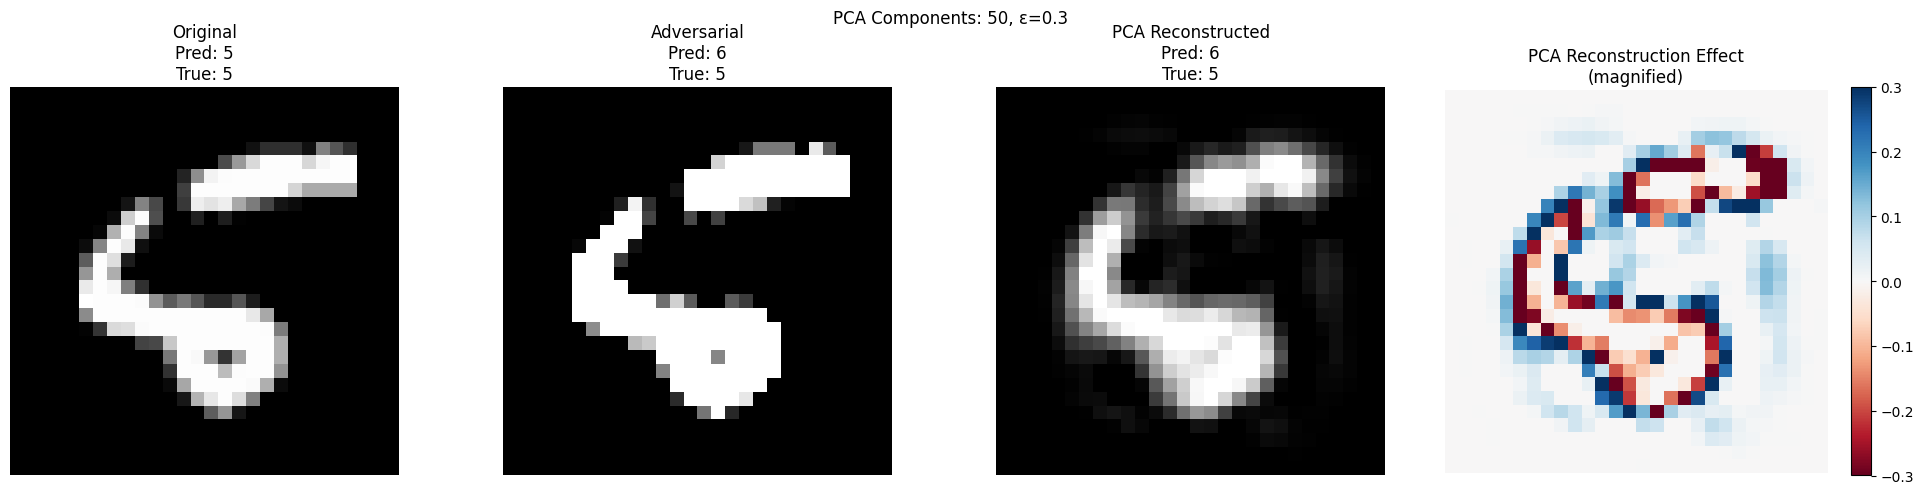


Results with 50 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 93.35%
PCA reconstructed accuracy: 92.71%

Testing with ε=0.3, PCA components=100


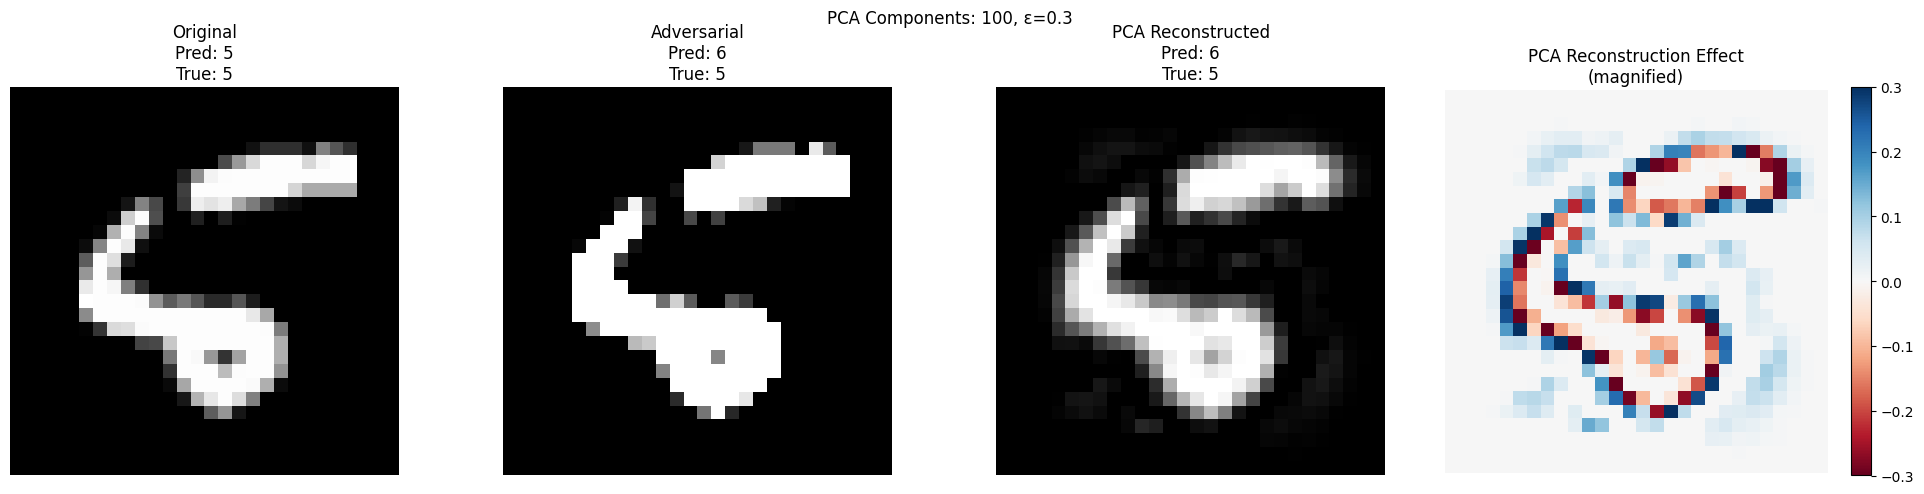


Results with 100 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 93.35%
PCA reconstructed accuracy: 93.38%

Testing with ε=0.3, PCA components=200


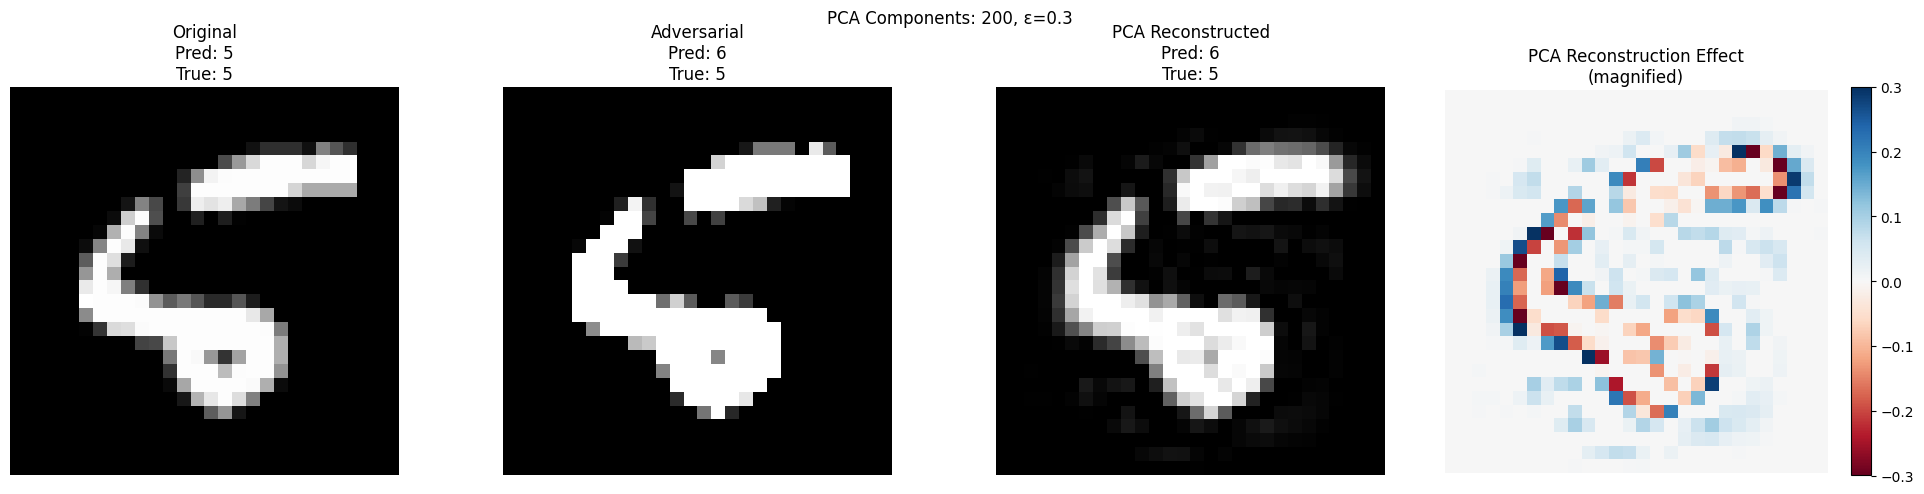


Results with 200 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 93.35%
PCA reconstructed accuracy: 93.03%

Testing with ε=0.4, PCA components=10


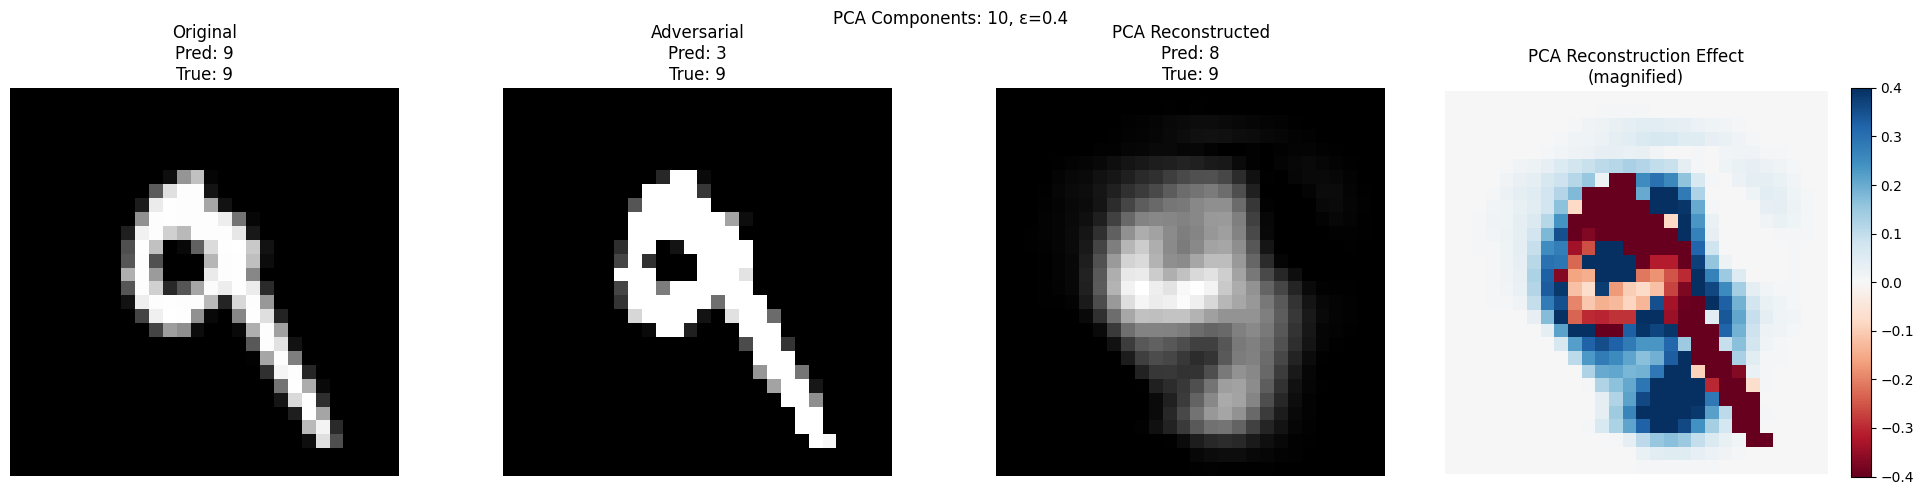


Results with 10 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 91.50%
PCA reconstructed accuracy: 71.99%

Testing with ε=0.4, PCA components=25


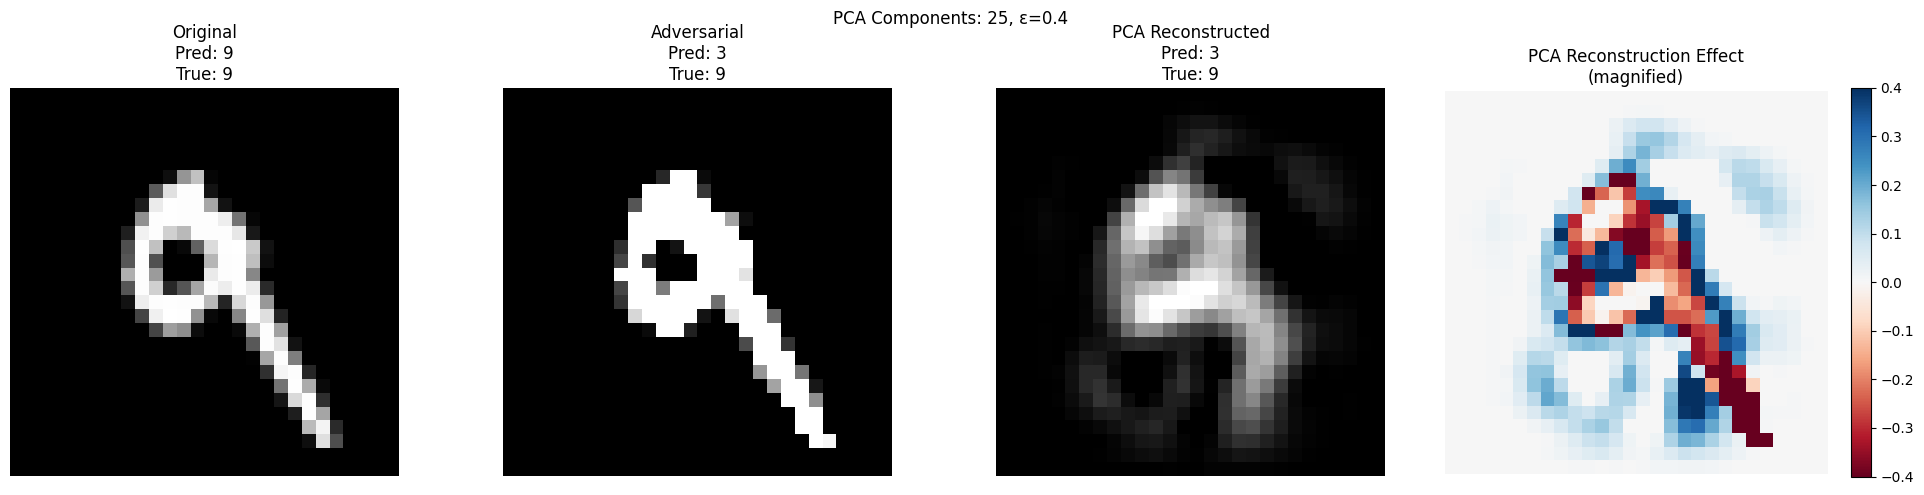


Results with 25 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 91.50%
PCA reconstructed accuracy: 88.32%

Testing with ε=0.4, PCA components=50


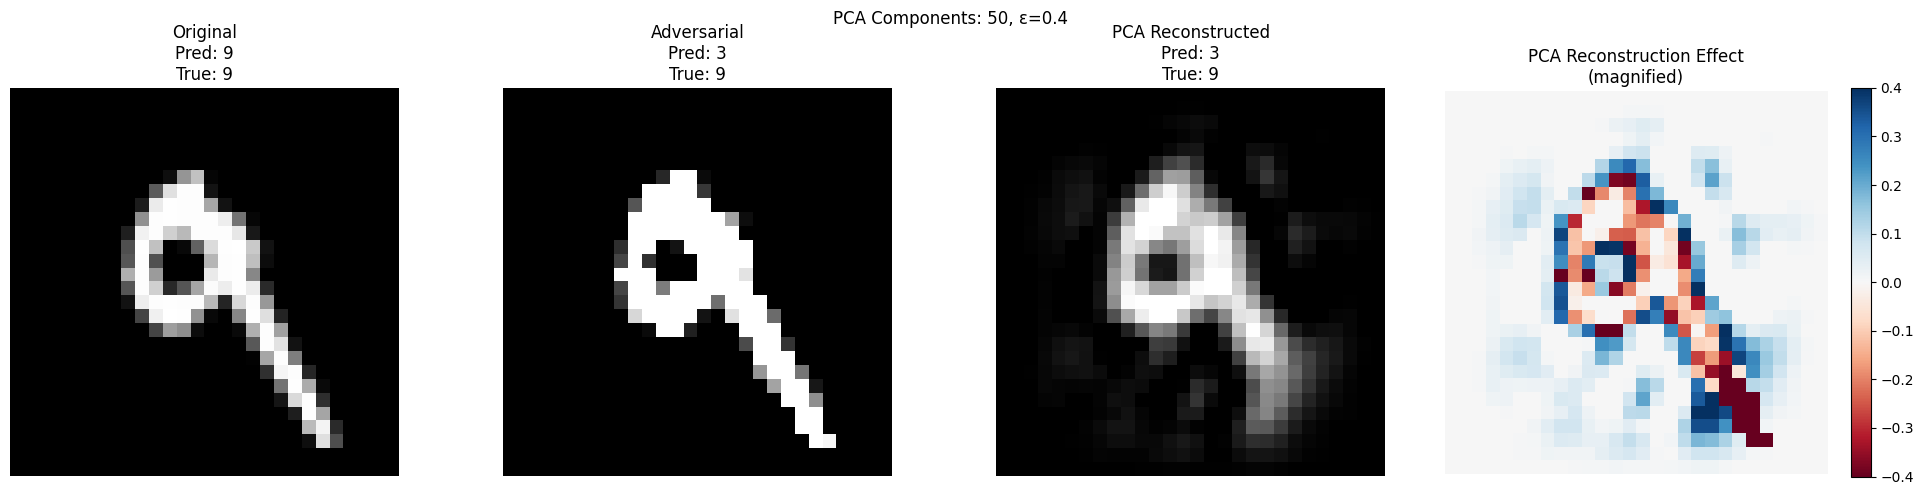


Results with 50 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 91.50%
PCA reconstructed accuracy: 91.34%

Testing with ε=0.4, PCA components=100


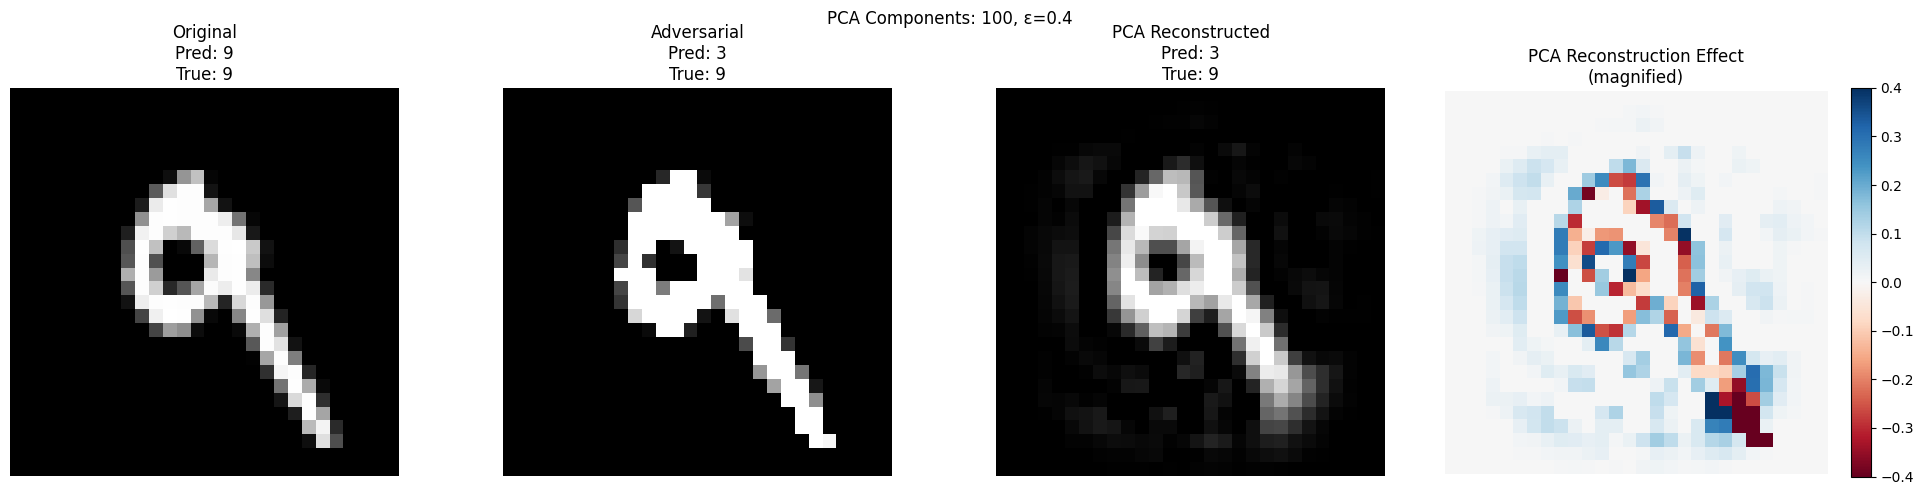


Results with 100 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 91.50%
PCA reconstructed accuracy: 92.09%

Testing with ε=0.4, PCA components=200


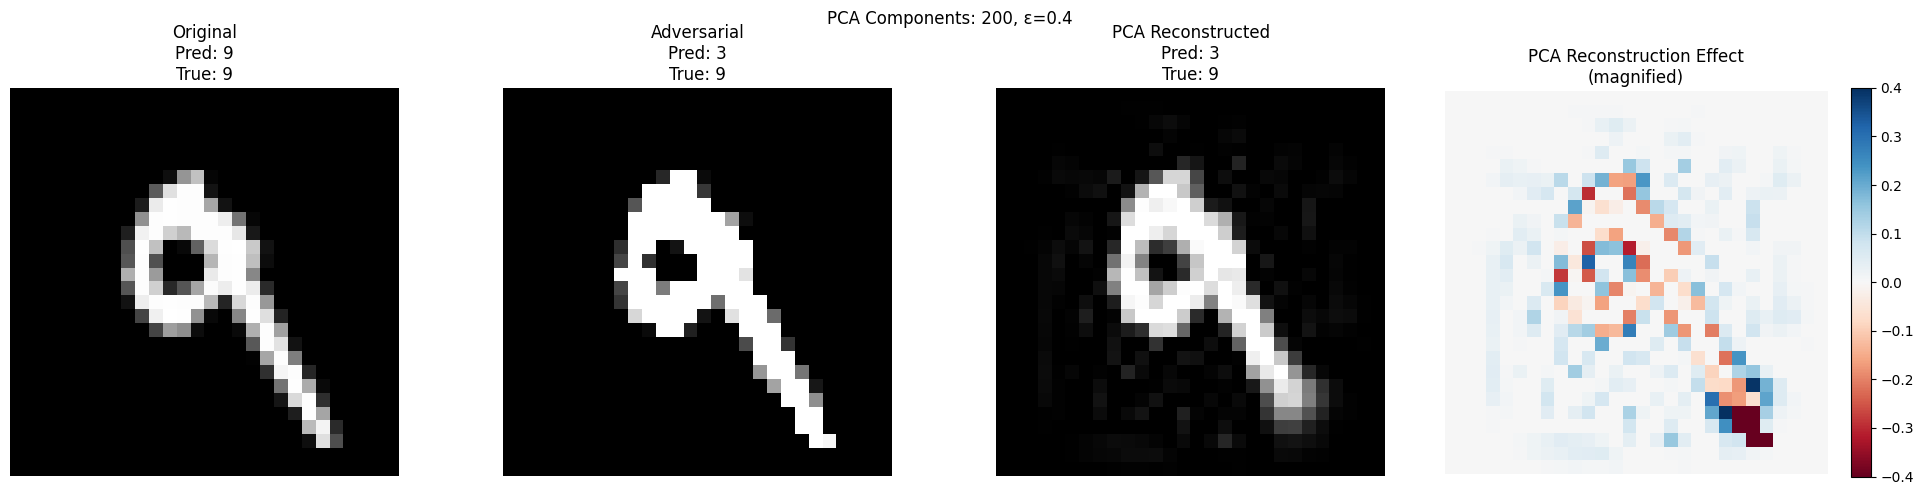


Results with 200 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 91.50%
PCA reconstructed accuracy: 91.67%

Testing with ε=0.5, PCA components=10


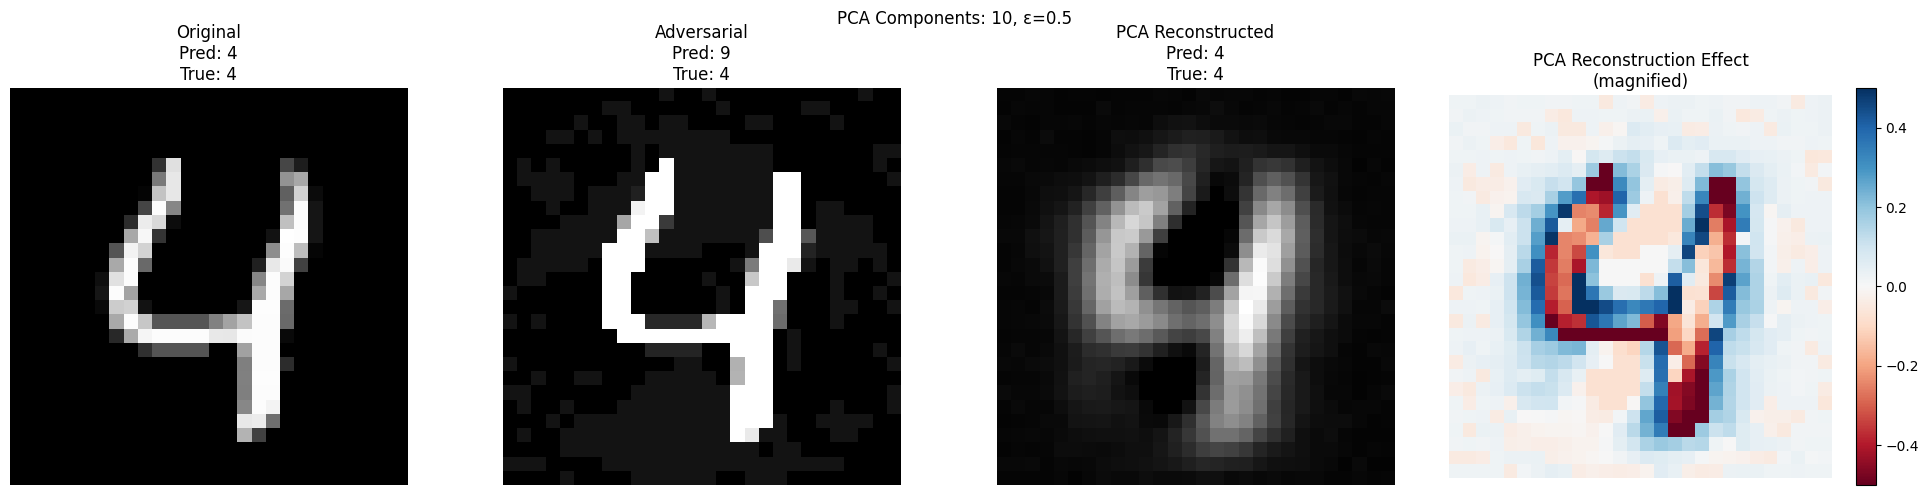


Results with 10 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 69.87%
PCA reconstructed accuracy: 62.82%

Testing with ε=0.5, PCA components=25


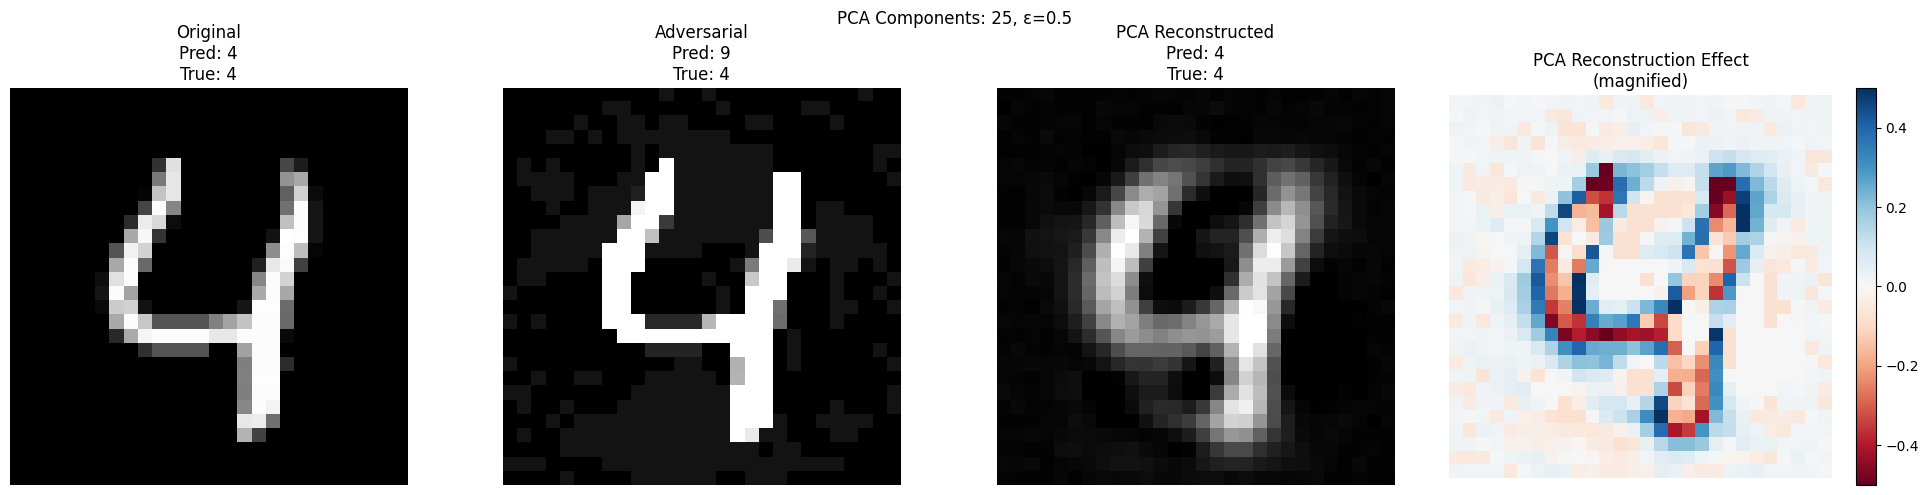


Results with 25 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 69.87%
PCA reconstructed accuracy: 78.57%

Testing with ε=0.5, PCA components=50


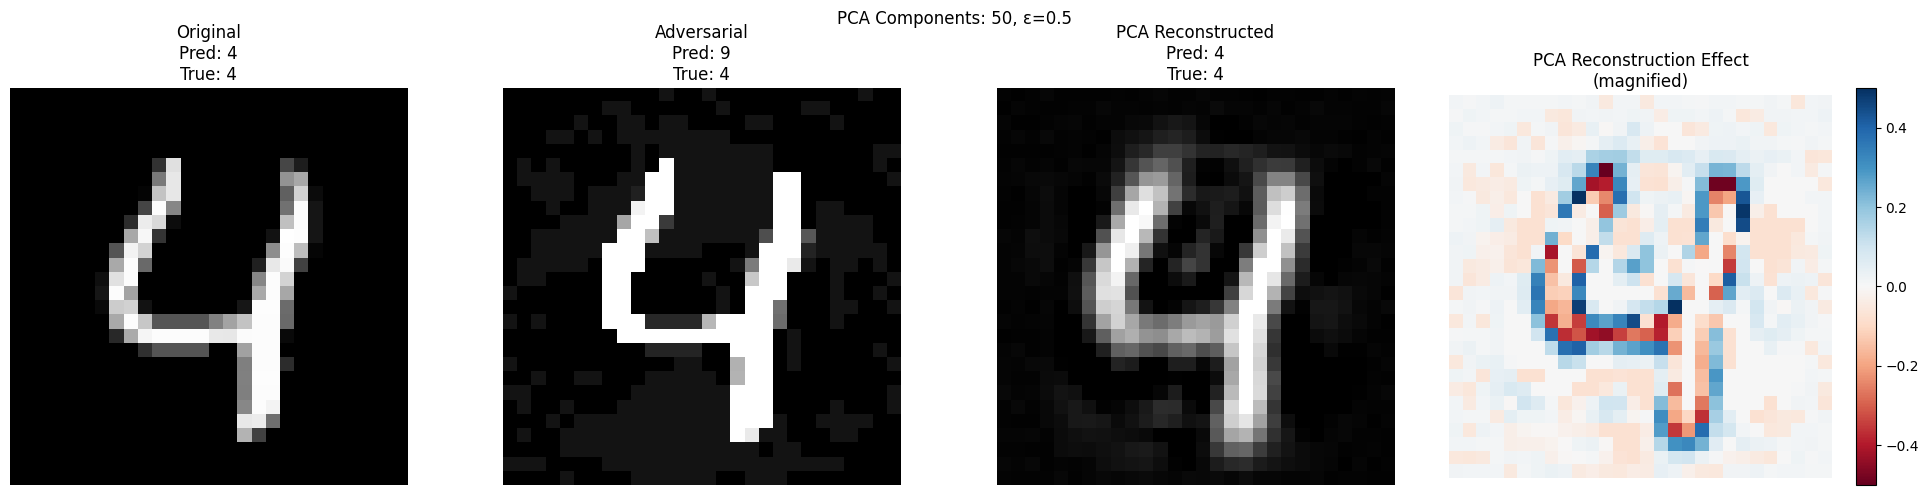


Results with 50 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 69.87%
PCA reconstructed accuracy: 80.59%

Testing with ε=0.5, PCA components=100


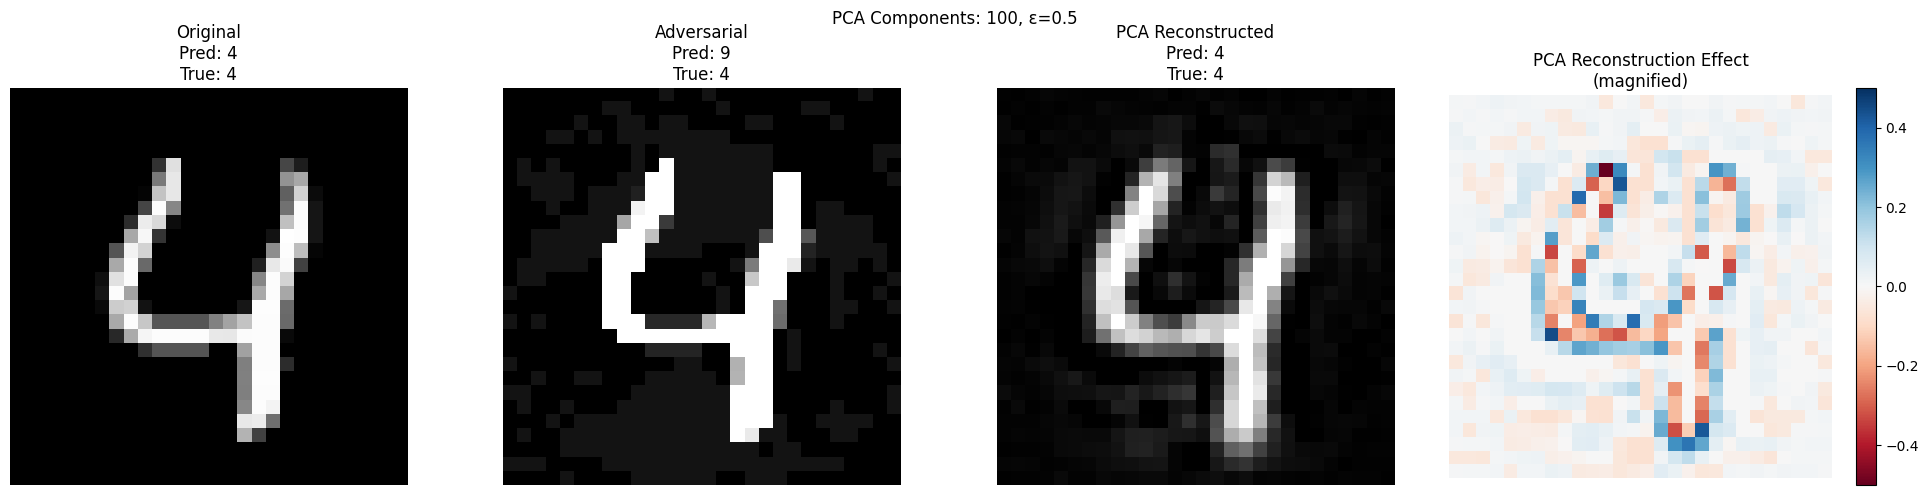


Results with 100 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 69.87%
PCA reconstructed accuracy: 78.11%

Testing with ε=0.5, PCA components=200


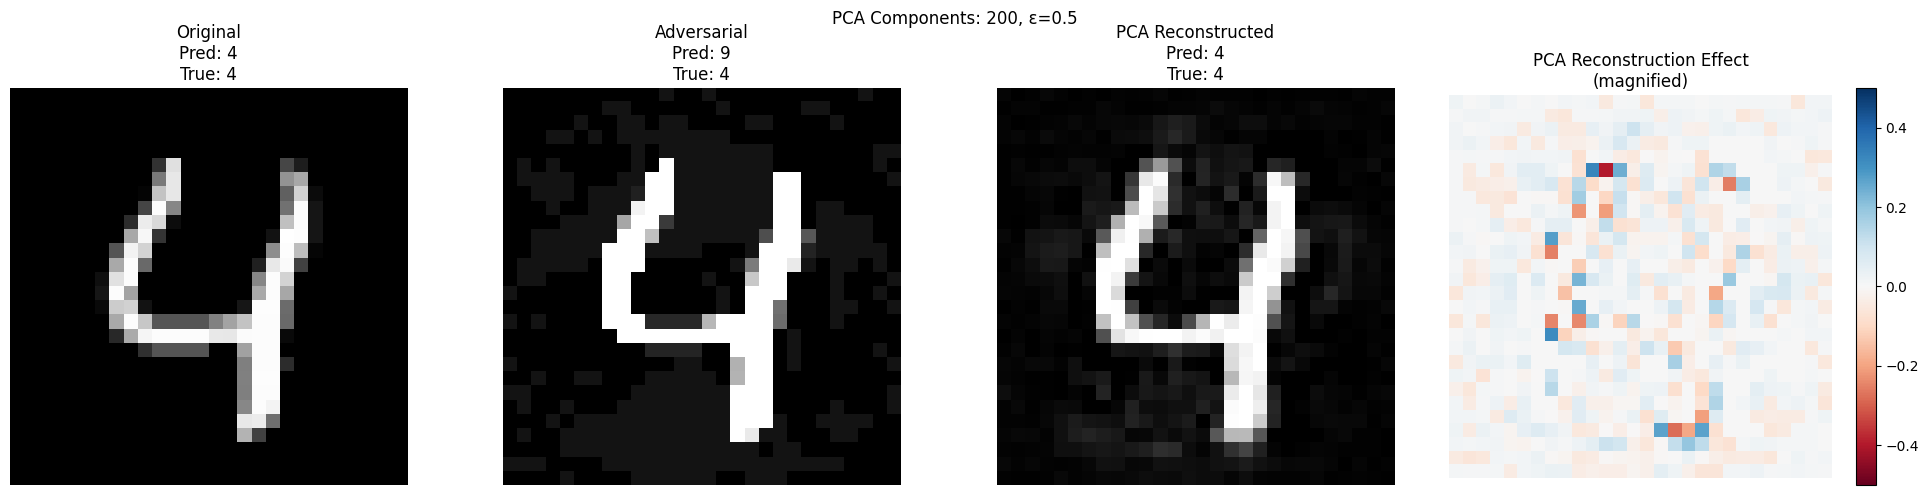


Results with 200 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 69.87%
PCA reconstructed accuracy: 75.07%

Testing with ε=0.6, PCA components=10


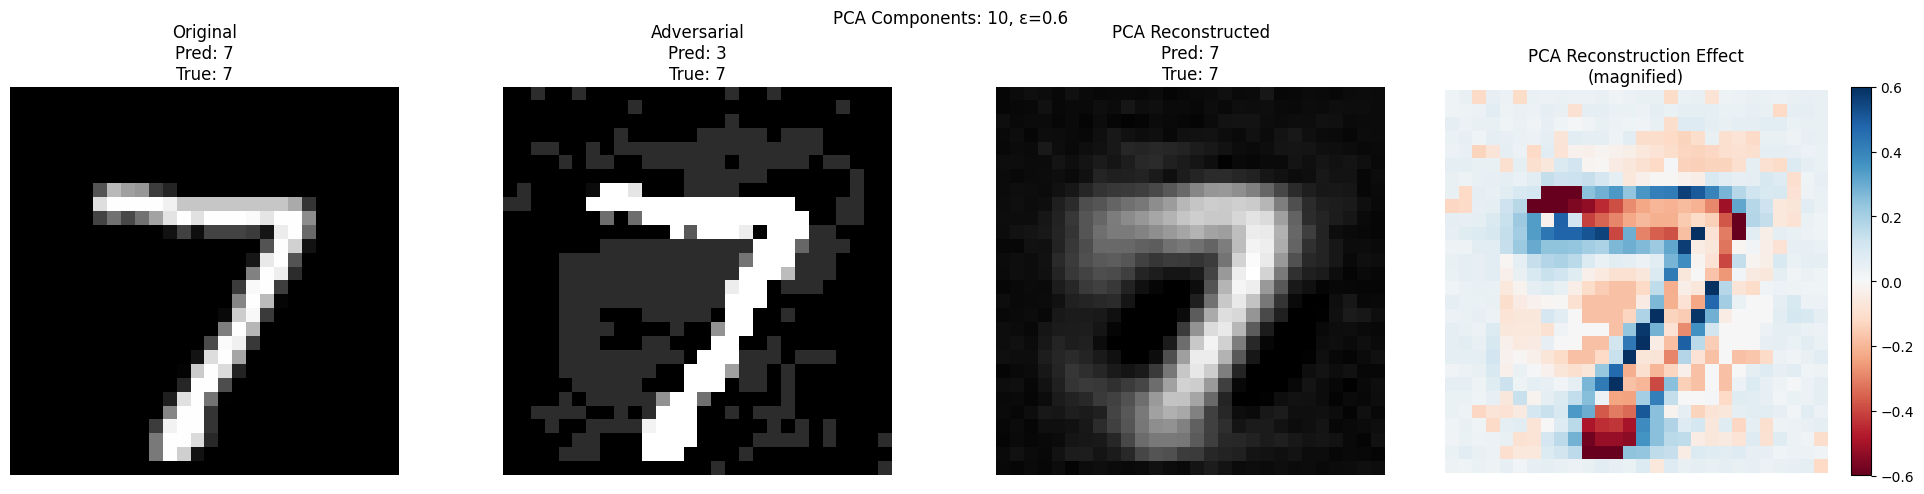


Results with 10 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 37.62%
PCA reconstructed accuracy: 46.01%

Testing with ε=0.6, PCA components=25


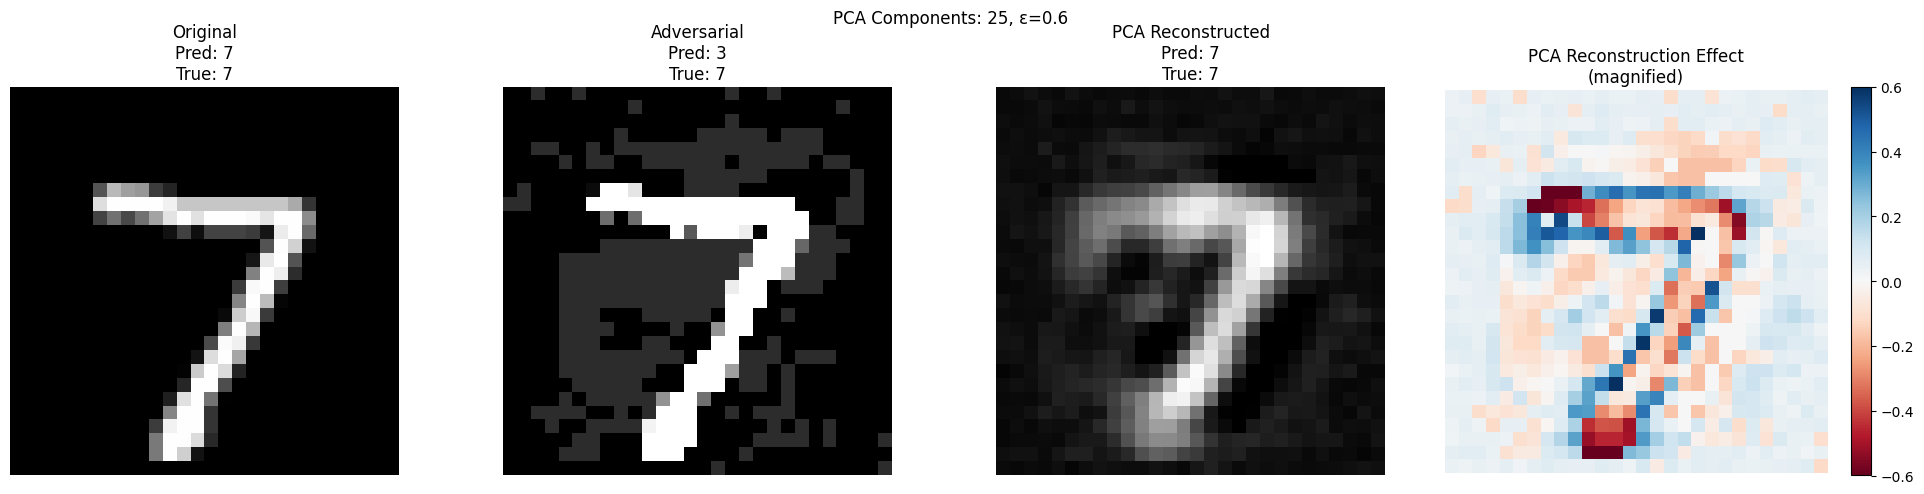


Results with 25 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 37.62%
PCA reconstructed accuracy: 54.92%

Testing with ε=0.6, PCA components=50


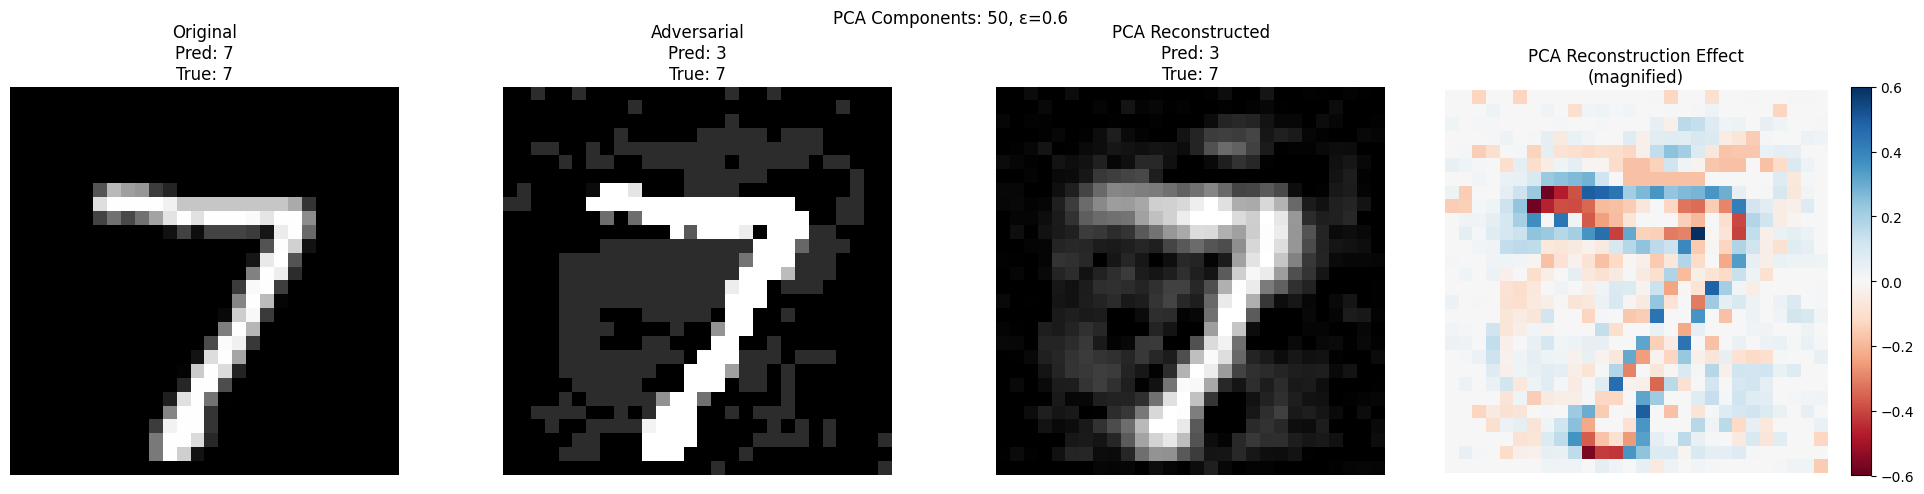


Results with 50 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 37.62%
PCA reconstructed accuracy: 48.07%

Testing with ε=0.6, PCA components=100


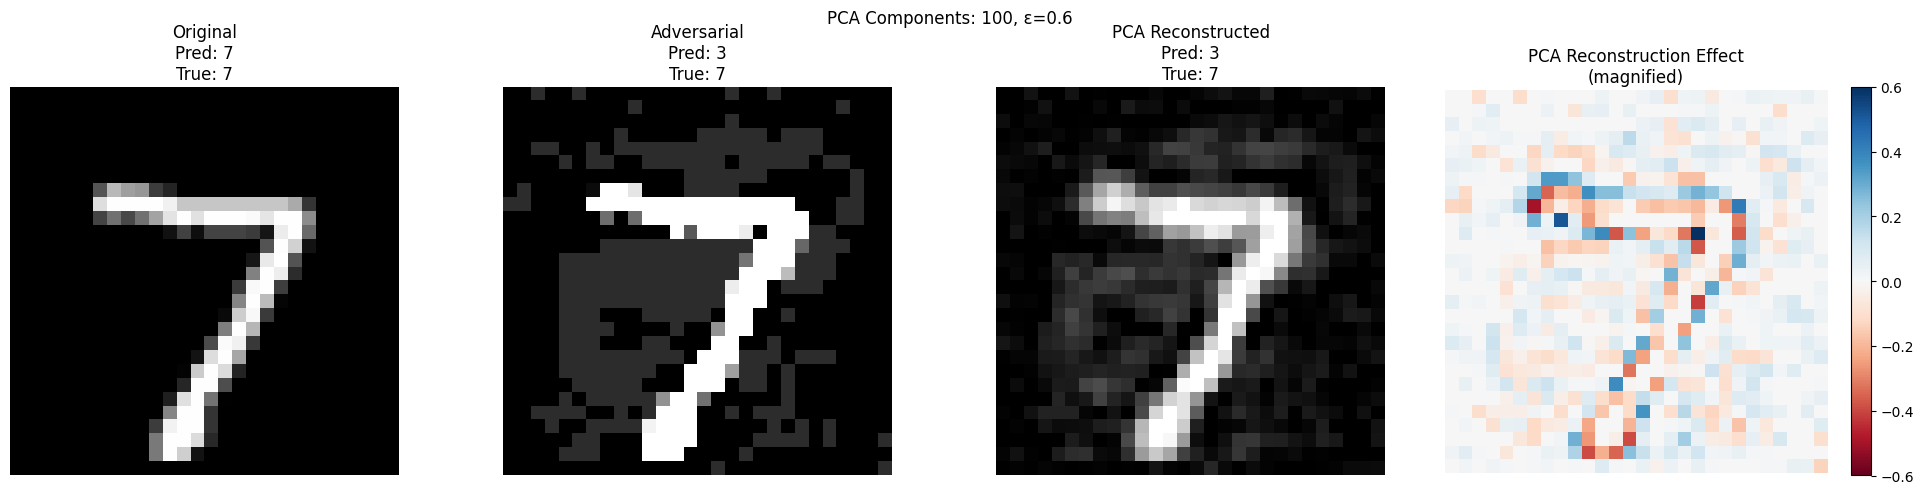


Results with 100 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 37.62%
PCA reconstructed accuracy: 42.98%

Testing with ε=0.6, PCA components=200


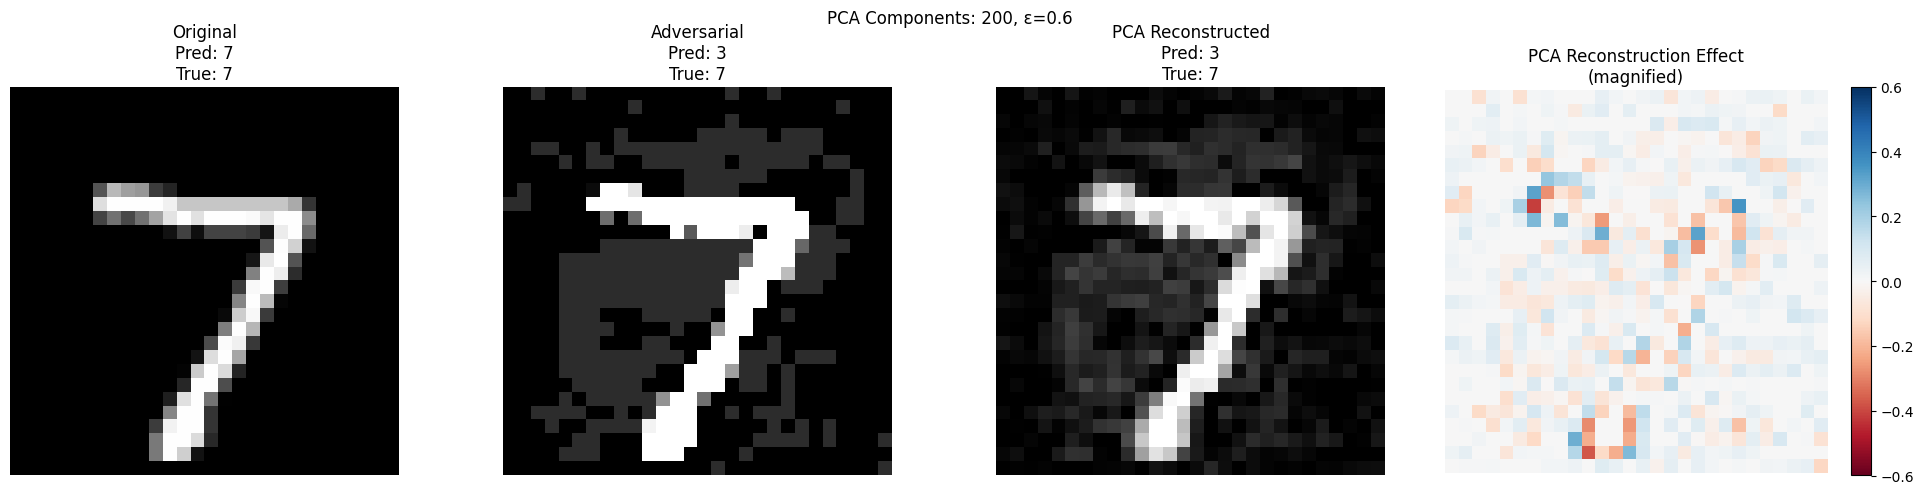


Results with 200 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 37.62%
PCA reconstructed accuracy: 41.53%

Testing with ε=0.7, PCA components=10


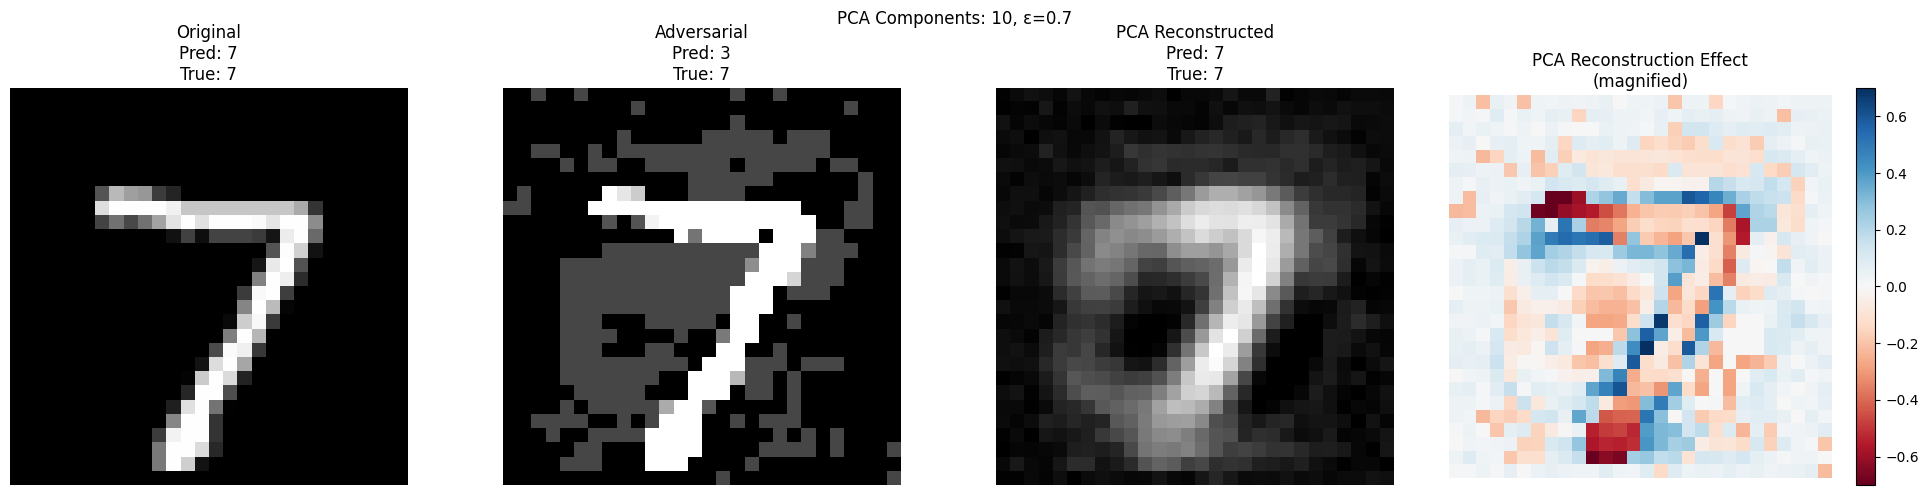


Results with 10 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 19.85%
PCA reconstructed accuracy: 28.09%

Testing with ε=0.7, PCA components=25


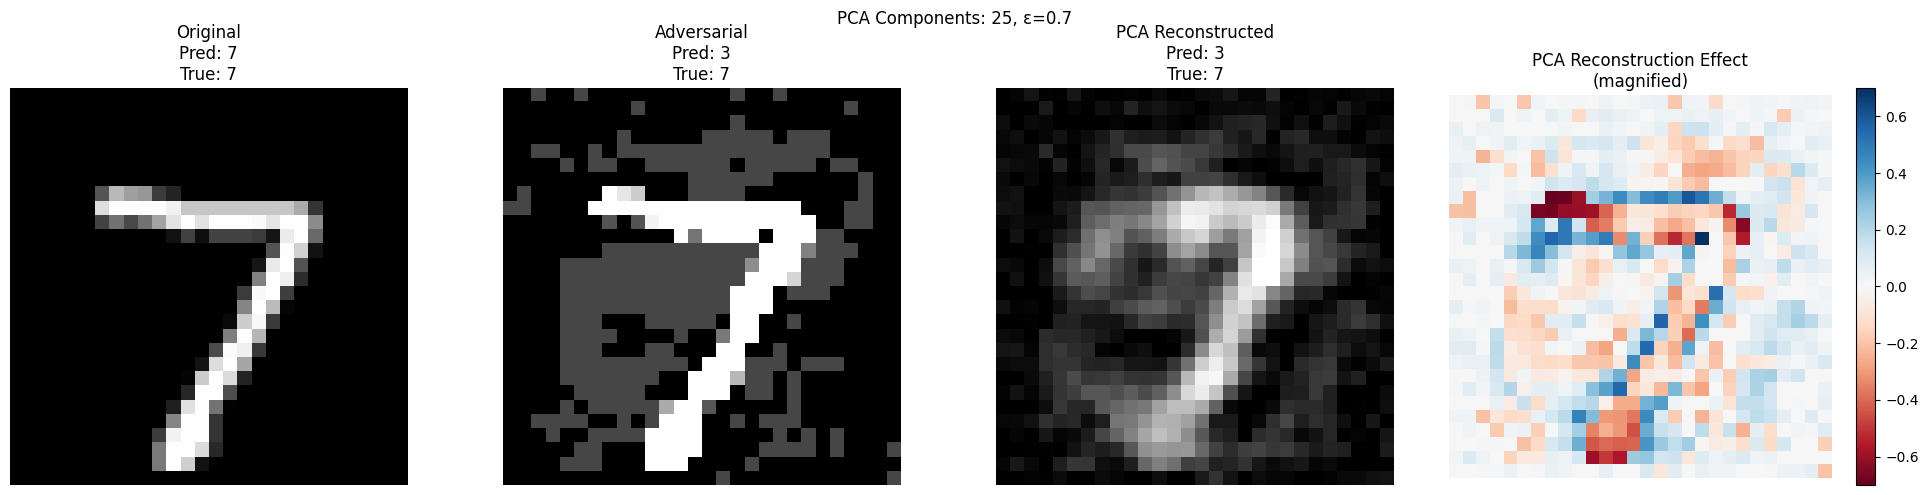


Results with 25 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 19.85%
PCA reconstructed accuracy: 26.79%

Testing with ε=0.7, PCA components=50


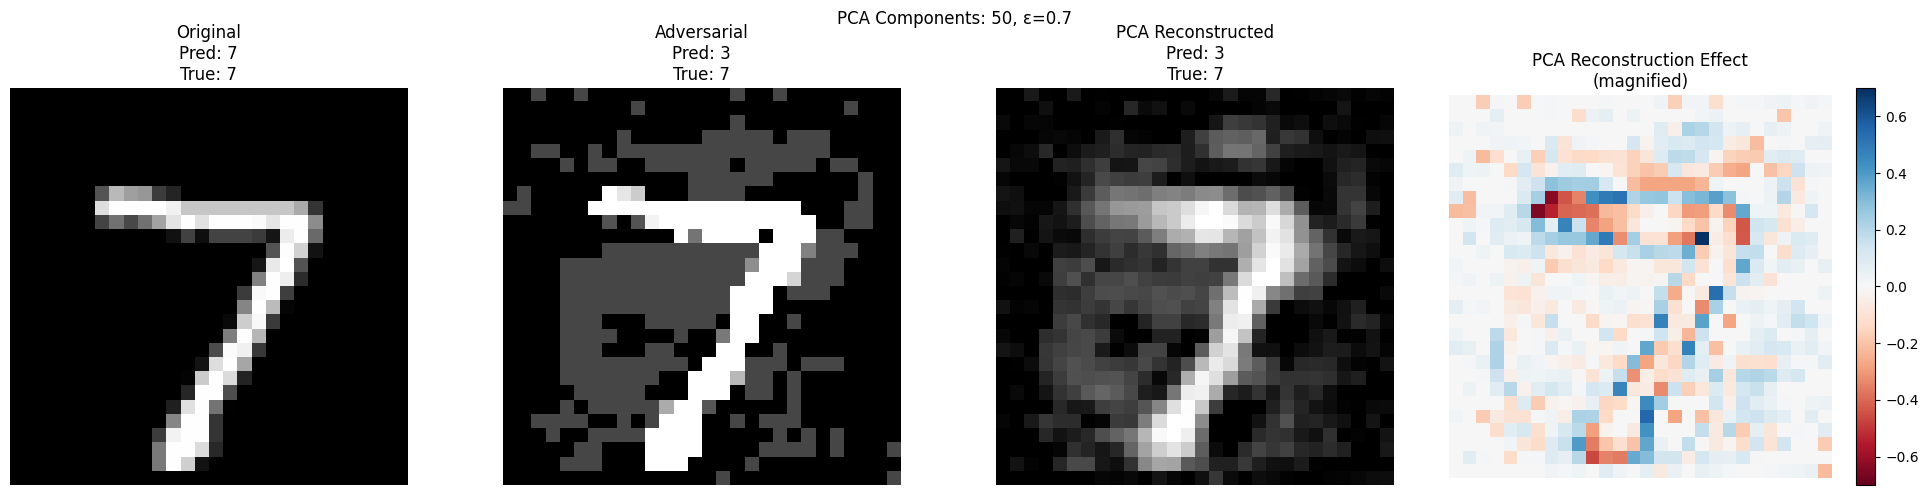


Results with 50 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 19.85%
PCA reconstructed accuracy: 23.97%

Testing with ε=0.7, PCA components=100


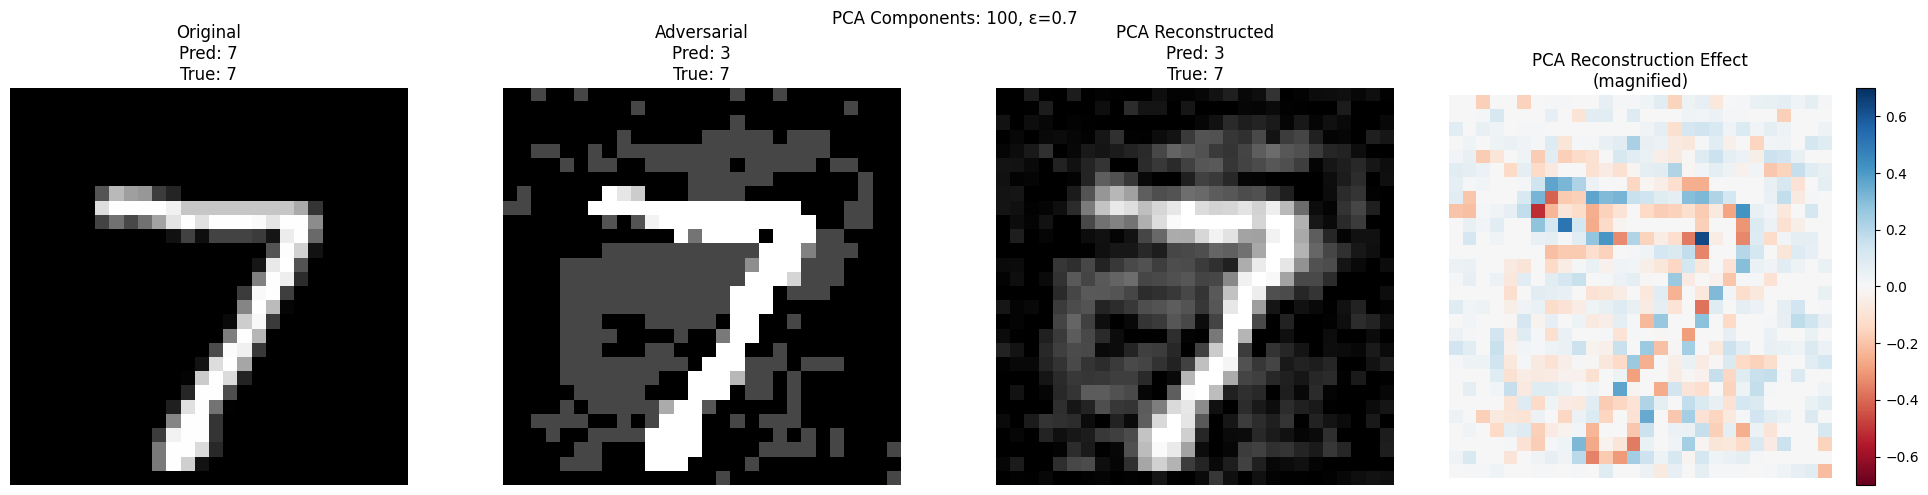


Results with 100 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 19.85%
PCA reconstructed accuracy: 22.06%

Testing with ε=0.7, PCA components=200


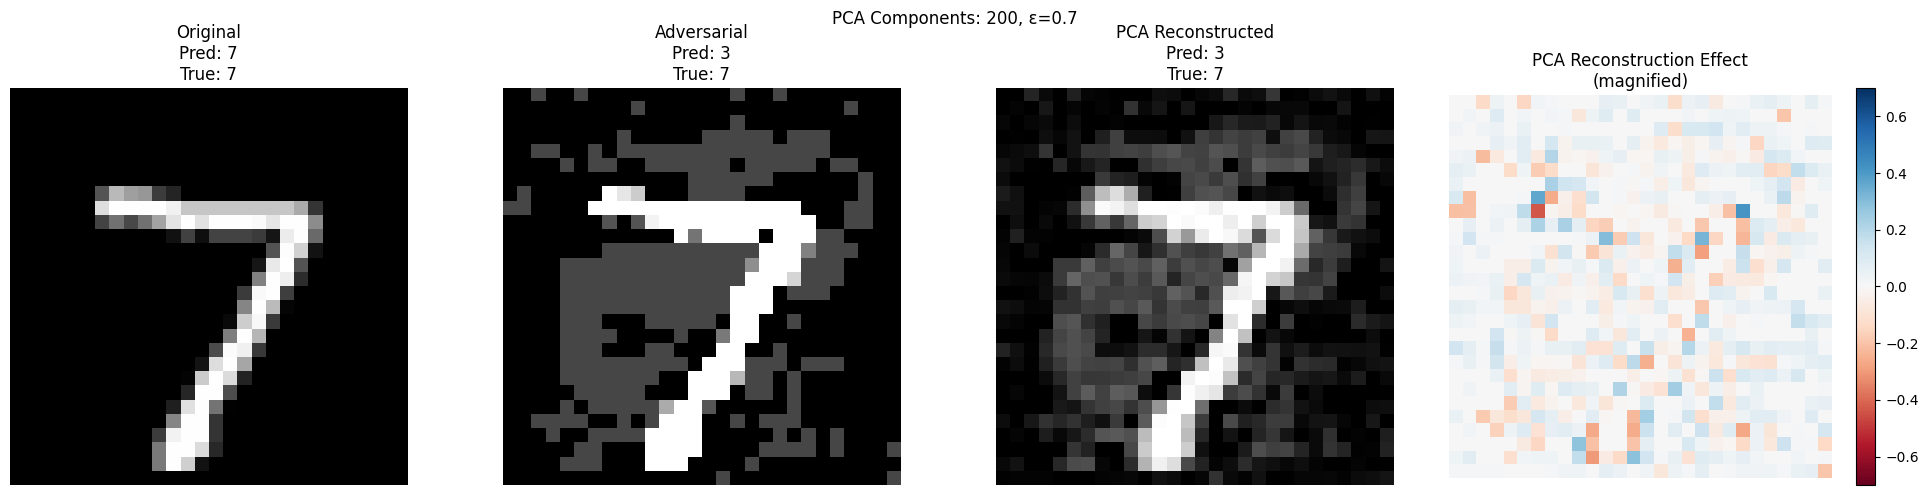


Results with 200 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 19.85%
PCA reconstructed accuracy: 21.68%

Testing with ε=0.8, PCA components=10


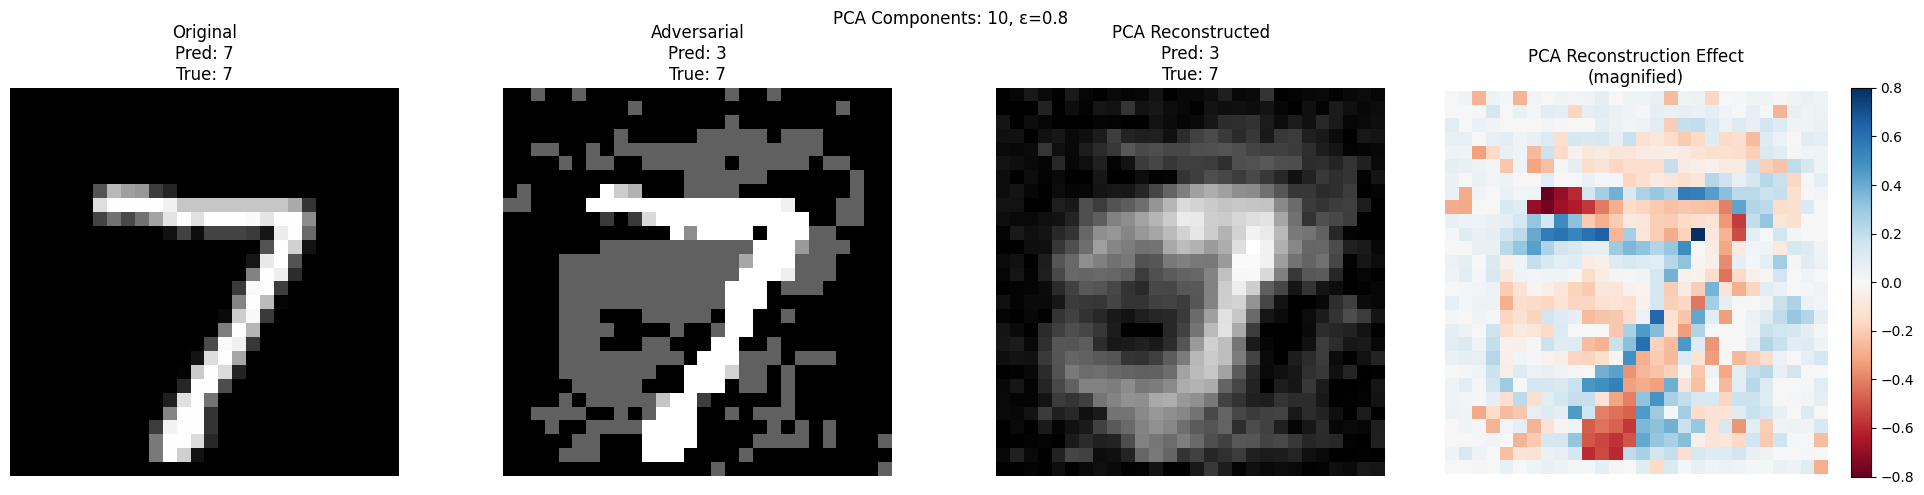


Results with 10 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 11.64%
PCA reconstructed accuracy: 17.03%

Testing with ε=0.8, PCA components=25


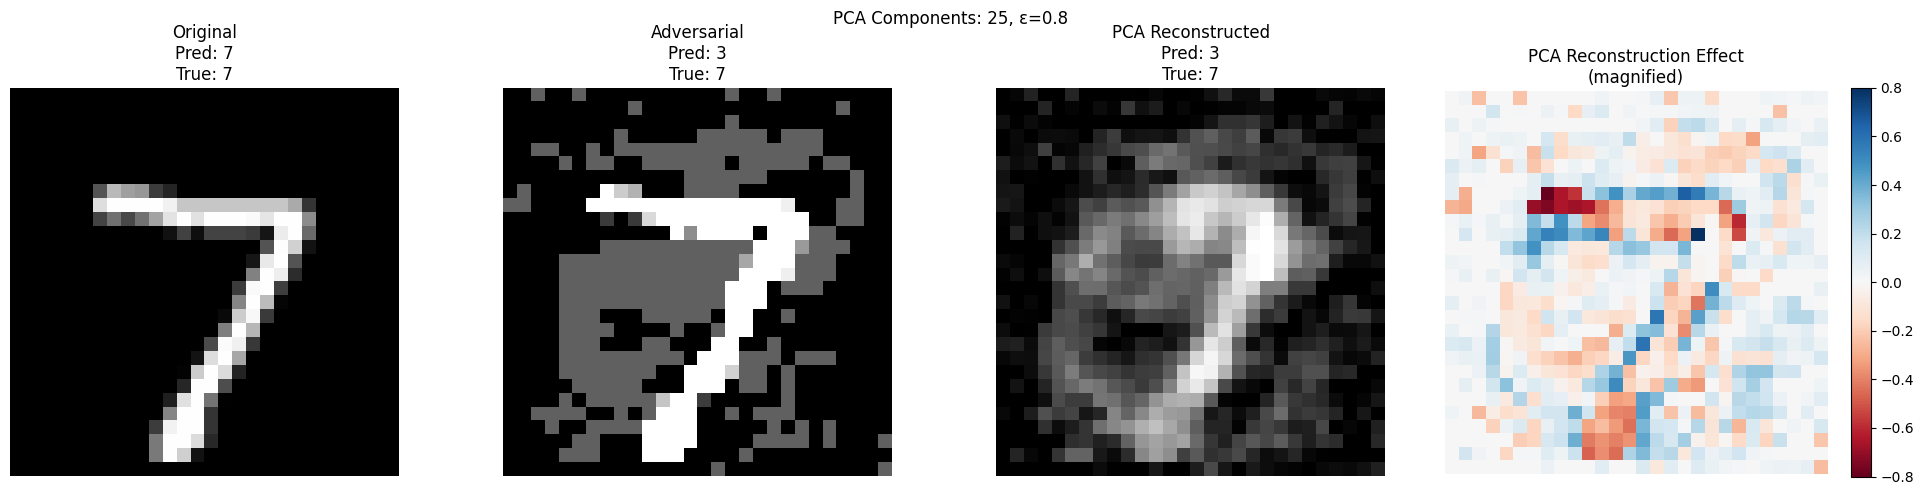


Results with 25 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 11.64%
PCA reconstructed accuracy: 14.46%

Testing with ε=0.8, PCA components=50


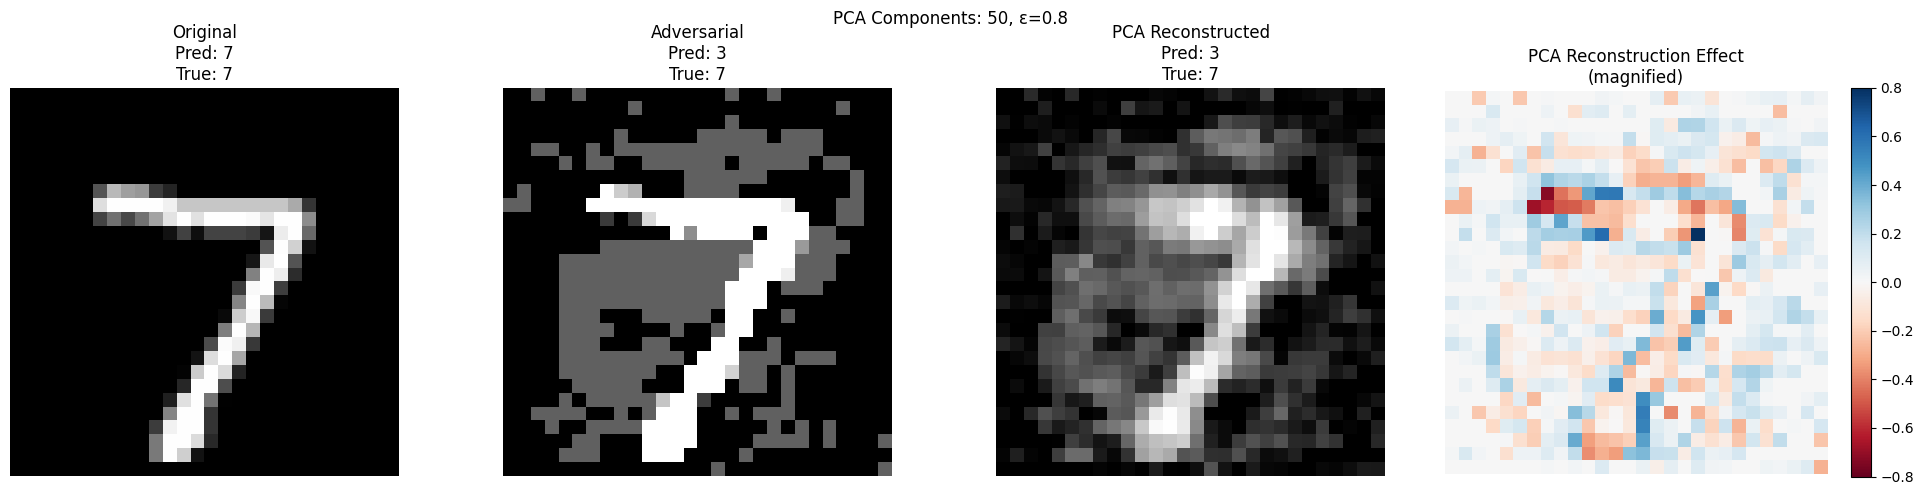


Results with 50 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 11.64%
PCA reconstructed accuracy: 13.29%

Testing with ε=0.8, PCA components=100


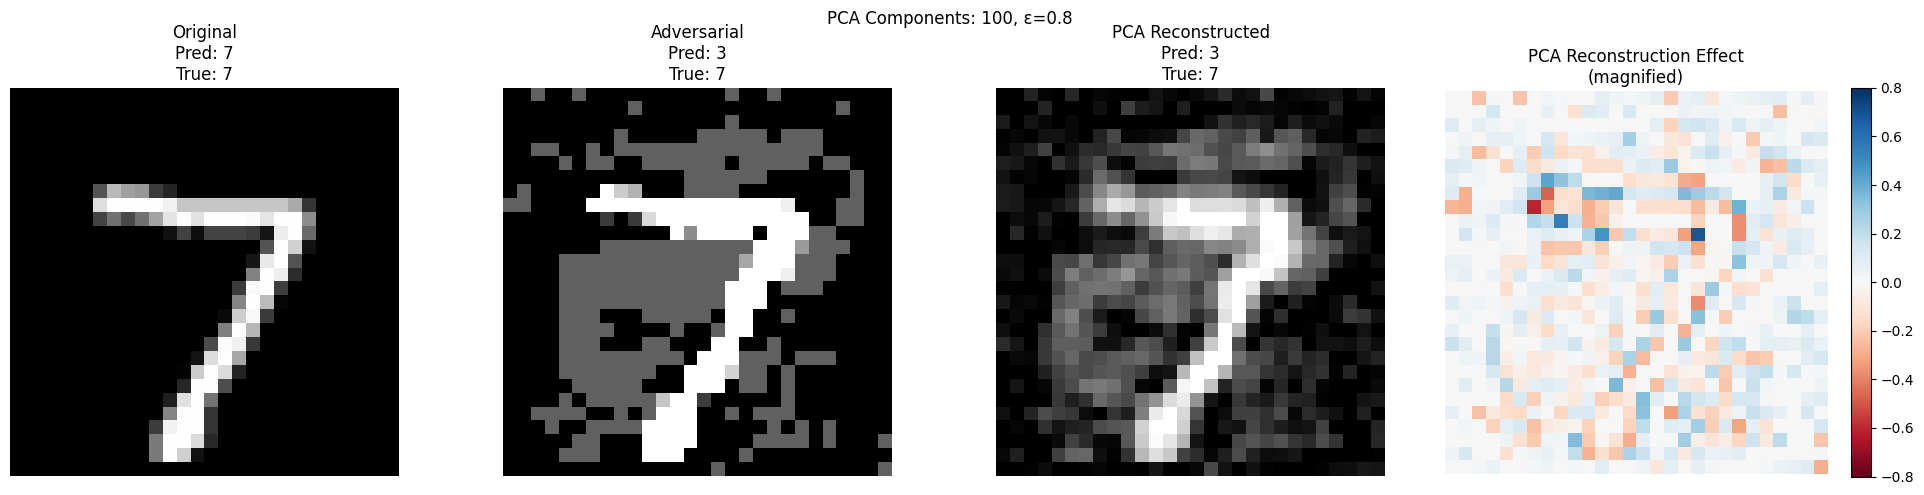


Results with 100 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 11.64%
PCA reconstructed accuracy: 12.91%

Testing with ε=0.8, PCA components=200


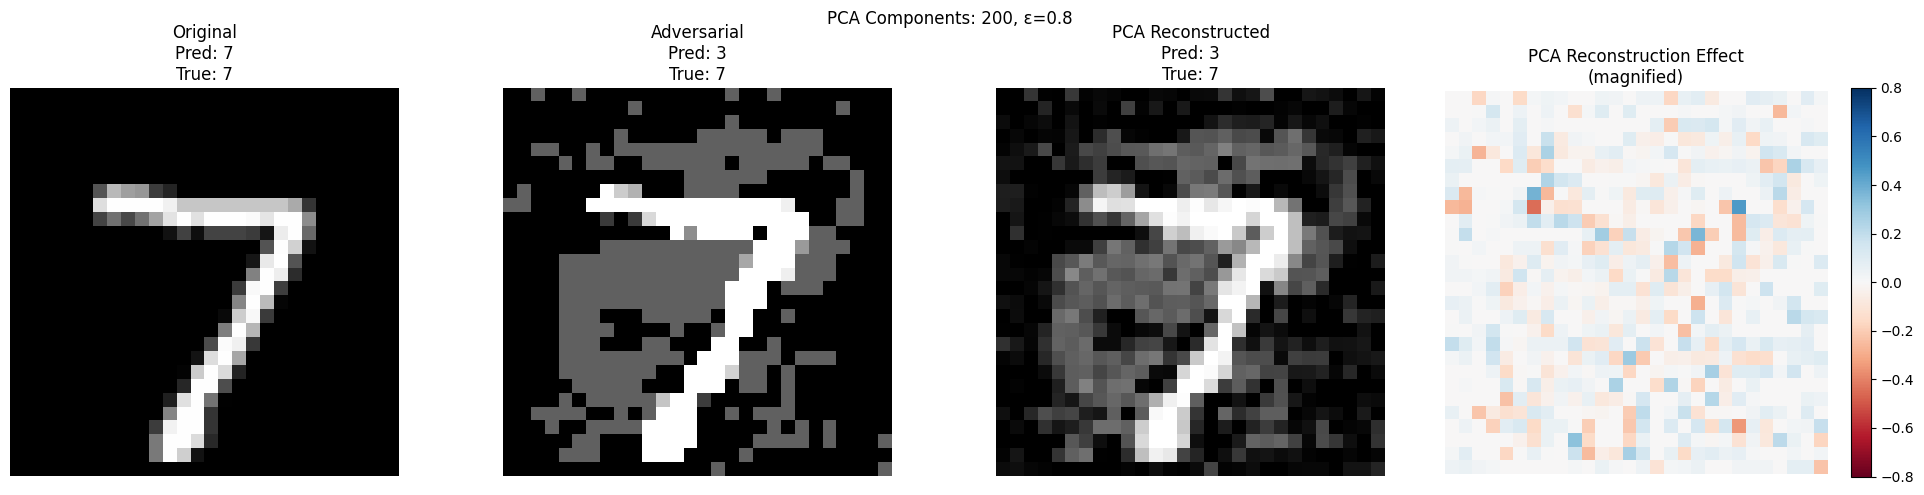


Results with 200 PCA components:
Original accuracy: 97.56%
Adversarial accuracy: 11.64%
PCA reconstructed accuracy: 12.52%


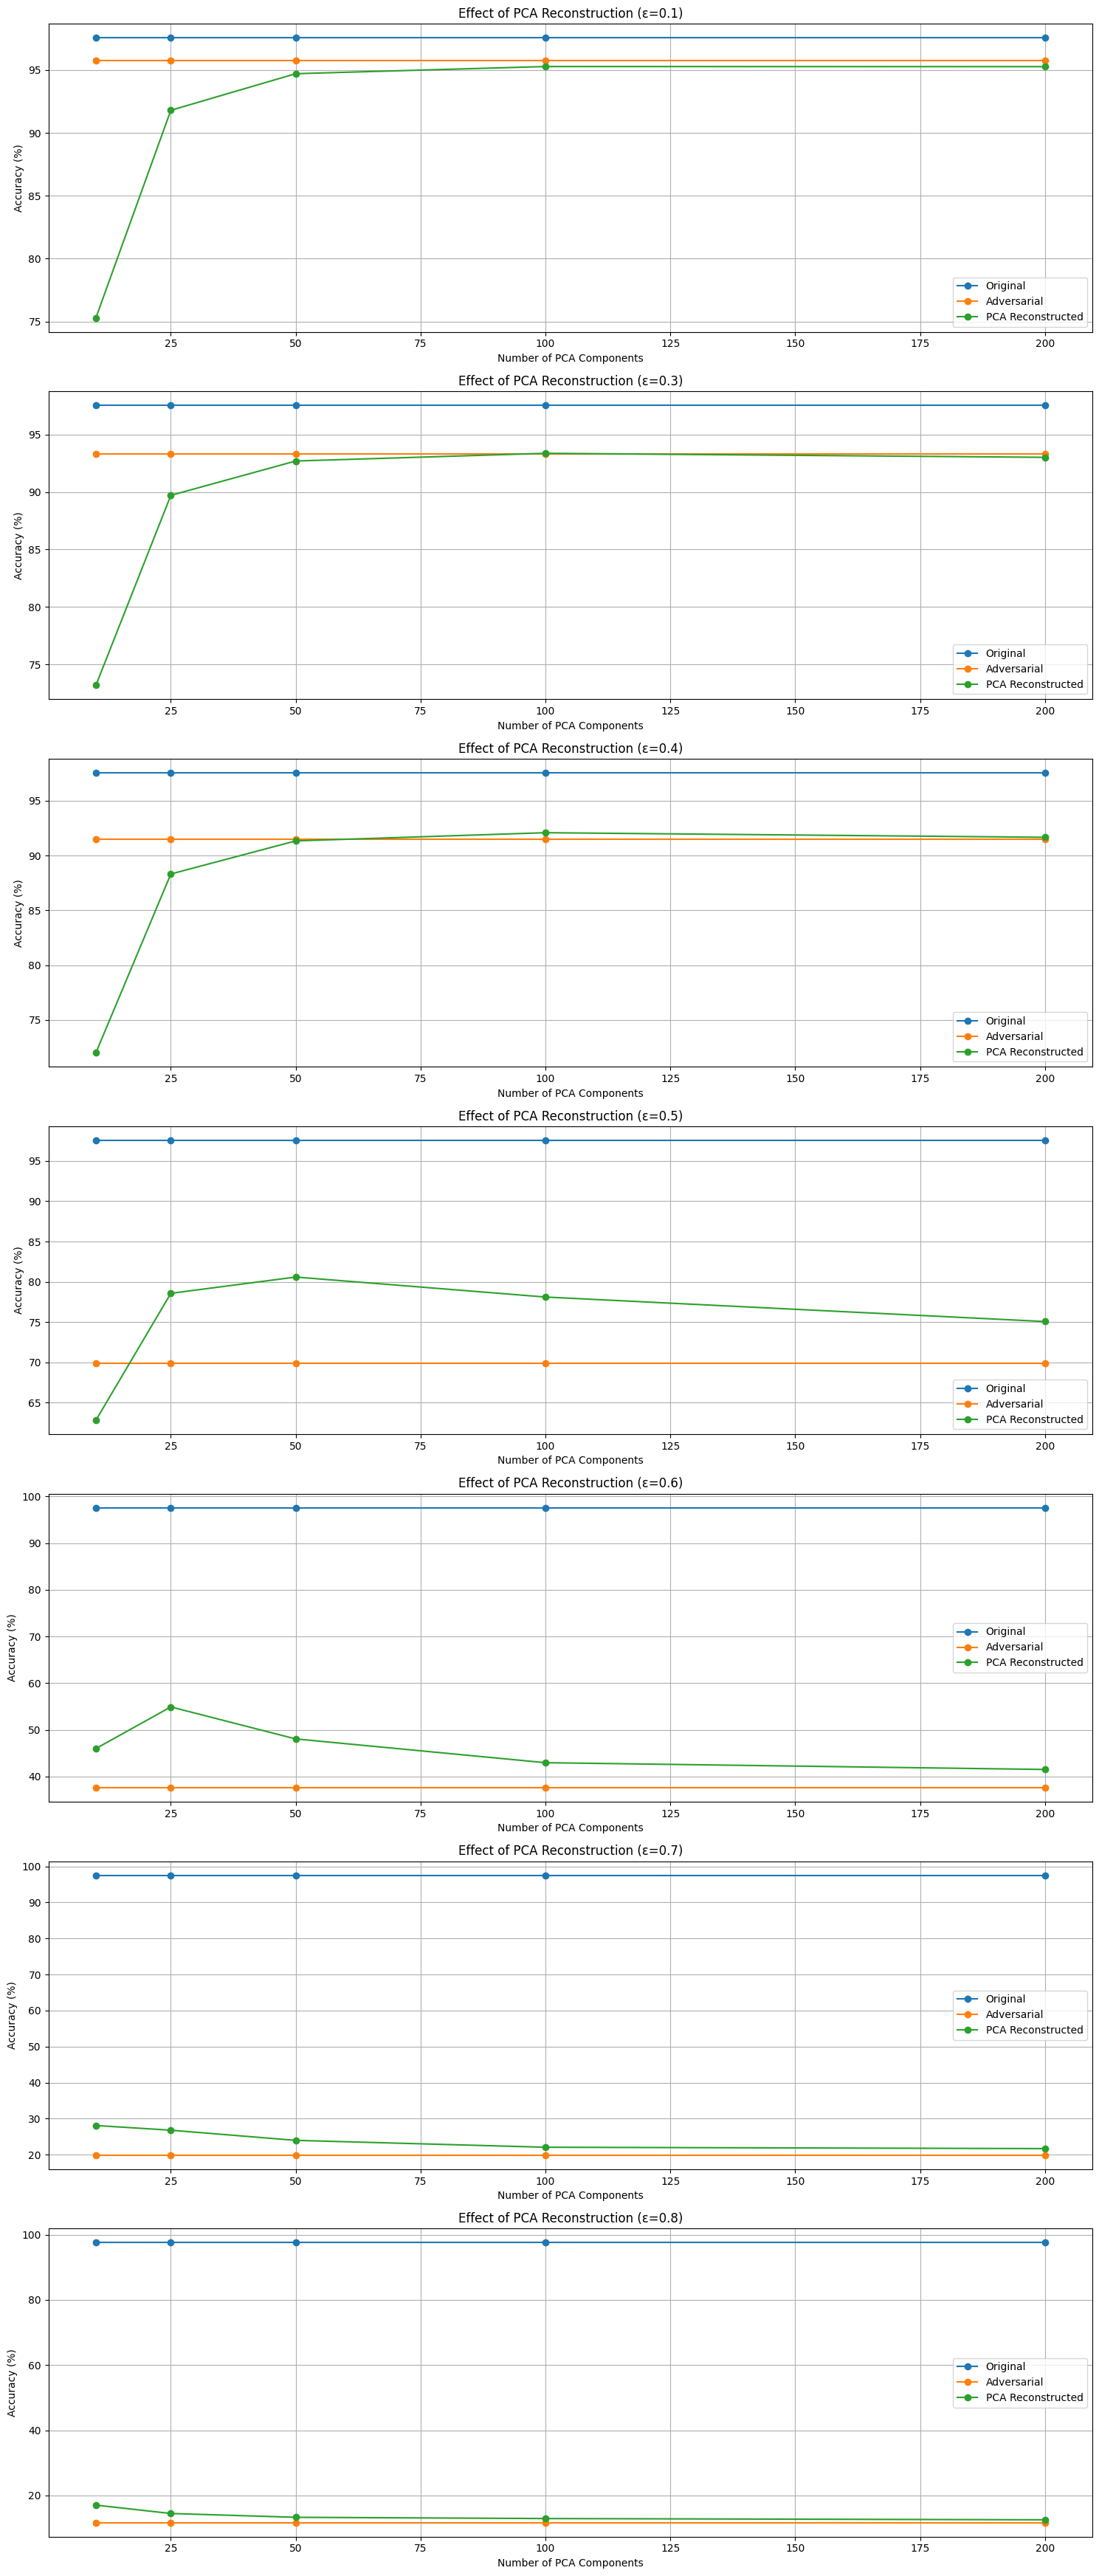

In [10]:
def apply_pca_reconstruction(images, n_components):
    """
    Apply PCA reduction and reconstruction to a batch of images
    
    Args:
        images: Tensor of shape (batch_size, 1, 28, 28)
        n_components: Number of PCA components to keep
    
    Returns:
        Reconstructed images in same shape as input
    """
    # Reshape images to 2D array (pixels, samples)
    flat_images = images.view(-1, 28*28).cpu().numpy().T  # Transpose to get (pixels, samples)
    
    # Fit and transform with PCA
    pca = PCA(n_components=n_components)
    reduced = pca.fit_transform(flat_images.T)  # Transform samples
    reconstructed = pca.inverse_transform(reduced)
    
    # Reshape back to image format and convert to tensor
    reconstructed = torch.tensor(reconstructed, dtype=torch.float32).to(device)
    reconstructed = reconstructed.view(-1, 1, 28, 28)
    
    # Ensure pixel values are in valid range [0,1]
    reconstructed = torch.clamp(reconstructed, 0, 1)
    
    return reconstructed

def test_pca_defense(attack, epsilon, pca_components):
    """
    Test if PCA reconstruction reduces adversarial effectiveness
    """
    model.eval()
    correct_orig = 0
    correct_adv = 0
    correct_pca = 0
    total = 0
    
    example_shown = False
    
    # Collect all images first
    all_images = []
    all_labels = []
    all_adv_images = []
    
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        adv_images = attack(images, labels)
        all_images.append(images)
        all_labels.append(labels)
        all_adv_images.append(adv_images)
    
    # Concatenate all batches
    images = torch.cat(all_images)
    labels = torch.cat(all_labels)
    adv_images = torch.cat(all_adv_images)
    
    # Apply PCA reconstruction to all adversarial images at once
    pca_images = apply_pca_reconstruction(adv_images, pca_components)
    
    with torch.no_grad():
        # Get predictions for all three versions
        orig_outputs = model(images)
        adv_outputs = model(adv_images)
        pca_outputs = model(pca_images)
        
        _, orig_predicted = torch.max(orig_outputs.data, 1)
        _, adv_predicted = torch.max(adv_outputs.data, 1)
        _, pca_predicted = torch.max(pca_outputs.data, 1)
        
        total = labels.size(0)
        correct_orig = (orig_predicted == labels).sum().item()
        correct_adv = (adv_predicted == labels).sum().item()
        correct_pca = (pca_predicted == labels).sum().item()
        
        # Show one example
        if not example_shown:
            for i in range(len(labels)):
                if (orig_predicted[i] == labels[i] and 
                    adv_predicted[i] != labels[i]):  # Find successful attack
                    plt.figure(figsize=(20, 5))
                    
                    # Original image
                    plt.subplot(1, 4, 1)
                    plt.title(f'Original\nPred: {orig_predicted[i].item()}\nTrue: {labels[i].item()}')
                    plt.imshow(images[i].squeeze().cpu().numpy(), cmap='gray')
                    plt.axis('off')
                    
                    # Adversarial image
                    plt.subplot(1, 4, 2)
                    plt.title(f'Adversarial\nPred: {adv_predicted[i].item()}\nTrue: {labels[i].item()}')
                    plt.imshow(adv_images[i].squeeze().cpu().numpy(), cmap='gray')
                    plt.axis('off')
                    
                    # PCA reconstructed image
                    plt.subplot(1, 4, 3)
                    plt.title(f'PCA Reconstructed\nPred: {pca_predicted[i].item()}\nTrue: {labels[i].item()}')
                    plt.imshow(pca_images[i].squeeze().cpu().numpy(), cmap='gray')
                    plt.axis('off')
                    
                    # Difference between adversarial and PCA
                    plt.subplot(1, 4, 4)
                    plt.title('PCA Reconstruction Effect\n(magnified)')
                    diff = (pca_images[i] - adv_images[i]).squeeze().cpu().numpy()
                    plt.imshow(diff, cmap='RdBu', vmin=-epsilon, vmax=epsilon)
                    plt.colorbar()
                    plt.axis('off')
                    
                    plt.suptitle(f'PCA Components: {pca_components}, ε={epsilon}')
                    plt.tight_layout()
                    plt.show()
                    example_shown = True
                    break
    
    # Calculate accuracies
    acc_orig = 100 * correct_orig / total
    acc_adv = 100 * correct_adv / total
    acc_pca = 100 * correct_pca / total
    
    print(f'\nResults with {pca_components} PCA components:')
    print(f'Original accuracy: {acc_orig:.2f}%')
    print(f'Adversarial accuracy: {acc_adv:.2f}%')
    print(f'PCA reconstructed accuracy: {acc_pca:.2f}%')
    
    return acc_orig, acc_adv, acc_pca

def run_pca_defense_experiments(pca_components_list, epsilons_list):
    """
    Run experiments with different combinations of PCA components and epsilon values
    
    Args:
        pca_components_list: List of PCA components to test
        epsilons_list: List of epsilon values to test
    """
    results = {}
    
    for eps in epsilons_list:
        results[eps] = []
        attack = torchattacks.FGSM(model, eps=eps)
        
        for n_components in pca_components_list:
            print(f"\nTesting with ε={eps}, PCA components={n_components}")
            acc_orig, acc_adv, acc_pca = test_pca_defense(attack, eps, n_components)
            results[eps].append((n_components, acc_orig, acc_adv, acc_pca))
    
    # Plot results for each epsilon
    plt.figure(figsize=(15, 5 * len(epsilons_list)))
    
    for i, eps in enumerate(epsilons_list):
        plt.subplot(len(epsilons_list), 1, i+1)
        
        components, acc_orig, acc_adv, acc_pca = zip(*results[eps])
        
        plt.plot(components, acc_orig, 'o-', label='Original')
        plt.plot(components, acc_adv, 'o-', label='Adversarial')
        plt.plot(components, acc_pca, 'o-', label='PCA Reconstructed')
        plt.xlabel('Number of PCA Components')
        plt.ylabel('Accuracy (%)')
        plt.title(f'Effect of PCA Reconstruction (ε={eps})')
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return results

# Test parameters
pca_components_list = [10, 25, 50, 100, 200]
epsilons_list = [0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Run experiments
results = run_pca_defense_experiments(pca_components_list, epsilons_list)